**Data**: 17/11/2021

# Teste Cientista de Dados
**Instruções básicas**: Utilize um ambiente de desenvolvimento *Jupyter* com *kernel* `Python 3+`. Para solucionar os desafios, utilize de quaisquer bibliotecas que julgar necessário, a menos que o enunciado especifique o contrário. Fique a vontade para utilizar um ambiente de desenvolvimento local ou remoto (exemplo: *Google Colab*). A entrega deve ser o próprio arquivo de *notebook*, no seguinte padrão: `nome-sobrenome.ipynb`
- Sabemos que o processo de desenvolvimento pode ser demorado, e a busca de melhores parâmetros para modelos é algo que exige processamento, na prova iremos avaliar muito mais a metodologia empregada, do que o resultado do modelo em si.

---

## $1.$
Utilize o *dataset* existente no *link* abaixo como base para realizar a prova.
- https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

---

## $2.$
Realize uma análise exploratória, utilizando de gráficos e análises estatísticas, para indicar o comportamento dos dados, inclusive dados faltantes. Assuma o completo desconhecimento da base de dados e procure quaisquer pontos relevantes para uma futura etapa de modelagem.
- Não se limite nessa análises, nos mostre o que você considera importante em uma análise exploratória.

---

## $3.$
Realize as etapas de pré-processamento e separação dos dados que julgar adequadas para o treinamento de um modelo de classificação binária sobre a variável alvo, utilizando todas as demais colunas do `DataFrame` como variáveis do modelo.

---

## $4.$
Apresente um gráfico $2D$ de dispersão dos dados de teste em relação à variável alvo. Neste procedimento as colunas de variáveis devem ser transformadas apenas em duas, formando os eixos $x$ e $y$ do gráfico. Para amostras com valor de `TARGET = 0` utilizar a cor azul; já para amostras de `TARGET = 1` utilizar vermelho.

---

## $5.$
A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em **árvore**. Utilize uma técnica de otimização de hiperparâmetros a sua escolha.

---

## $6.$
A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em **redes neurais**. Utilize uma técnica de otimização de hiperparâmetros ou busca automática de rede a sua escolha.

---

## $7.$
A partir dos dados da etapa 3, treine um modelo utilizando qualquer técnica a sua escolha, desde que seja diferente das utilizadas nas questões 5 e 6.

---

## $8.$
Compare os resultados dos três modelos acima e justifique a métrica escolhida para avaliação.

---

## $9.$
Escolha um dos três modelos acima. Supondo que um falso negativo tenha um custo muito maior do que falso positivo, e sabendo que a predição da variável alvo é realizada entre `0` e `1`, mesmo em modelos de classificação binária, selecione um limiar para definir se uma pessoa terá ou não um derrame e justique a sua escolha.

---

## $10.$
Realize uma análise de "*Equal Error Rate*" e uma análise "**SHAP**" para o modelo a cima e descreva suas conclusões.

---

## $11.$
Crie uma classe que carregue o modelo treinado do disco e tenha uma função de predição. A função de predição deve receber como parâmetro uma única amostra de dados e retorne o resultado de predição (`0` ou `1`) utilizando o limiar definido na questão 9.

---

## $12.$
Disserte sobre como seria o modelo ideal para que o modelo gerado seja colocado em produção, de forma que possa ser utilizado para realizar predições em tempo real.

---

## $13.$
Escreva uma função que receba uma lista (`array`) de números inteiros e retorne um booleano (`True` ou `False`) indicando se a lista é monotônica. Para essa não é permitido o uso de nenhuma biblioteca, somente a linguagem *Python* com seus tipos nativos.

```python
def isMonotonic(A: List[int]) -> bool:
    <seu código aqui>
```

# Importação de Bibliotecas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pickle
import json

import random
random.seed(42)

import numpy as np
np.random.seed(42)

import pandas as pd
from scipy.stats import ks_2samp
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt
import seaborn as sns

import string
from typing import List, Tuple

from functools import reduce
from itertools import permutations

from sklearn.preprocessing import StandardScaler, \
                                  MinMaxScaler, \
                                  RobustScaler, \
                                  PowerTransformer

from imblearn.over_sampling import RandomOverSampler, \
                                   SMOTE

from imblearn.under_sampling import RandomUnderSampler, \
                                    NearMiss

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, \
                        SVC

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    cross_val_predict, \
                                    KFold 

from sklearn.metrics import classification_report, \
                            confusion_matrix, \
                            roc_curve, \
                            roc_auc_score, \
                            accuracy_score, \
                            precision_recall_curve, \
                            auc

In [3]:
!pip3 install scikit-optimize --quiet
!pip install scikit-plot --quiet

from scikitplot.metrics import plot_confusion_matrix

from skopt import BayesSearchCV
from skopt.space import Real, \
                        Categorical, \
                        Integer

In [4]:
!pip install shap --quiet
import shap

In [5]:
plt.rcParams['figure.figsize'] = (10,5)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nome do Candidato

In [7]:
clfa = DecisionTreeClassifier()

clfa.fit(np.reshape(list(range(1,27)),(-1,1)), 
         list(string.ascii_lowercase))

scaler = MinMaxScaler(feature_range=(1,26))

X_train = [-0.76,-1,-0.96,-0.32,-0.68,-0.84,-0.56,-0.72,
           -0.84,-0.48,-0.32,-0.68,-0.36,-0.2,-0.84,-0.4,
           -0.32,0,-0.04,-0.24,-0.44,-0.92,-0.6,-0.68]

X_test = scaler.fit_transform(np.reshape(X_train, (-1,1)))
pred = clfa.predict(X_test)
name = reduce(lambda x, y: x + y, np.insert(pred, [7,15], " ")).title()
print(name)

Gabriel Henrique Przytocki


# Início do *Case* de *Data Science*: ***Stroke Prediction***

## Contexto
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## $0$.

### FUNÇÕES AUXILIARES

In [8]:
def computeKS(y_true: np.array, 
              y_prob_positive: np.array) -> float:
    """
    Kolmogorov-Smirnov value obtained from ground-truth targets (y_true) and
    their probabilities (y_prob_positive).

    Params:
        y_true (pd.Series): Ground-truth labels
        y_prob_positive (pd.Series): The probabilities of TARGET=1

    Returns:
        ks (float): The KS rate
    """
    vals = list(zip(y_true, y_prob_positive))
    positives = []
    negatives = []
    for a, b in vals:
        if a == 0:
            negatives.append(b)
        else:
            positives.append(b)
    ks = 100.0 * ks_2samp(positives, negatives)[0]
    return ks

In [9]:
def data_balancer(Balancer: object, 
                  X: pd.DataFrame, 
                  y: pd.DataFrame) -> tuple:
    """
    Realiza o balanceamento de classes nos dados
    Params:
        Balancer: classe do modelo de balanceamento
        X: dados dos atributos
        y: target
    Returns:
        X, y: dados balanceados
    """
    X, y = Balancer.fit_resample(X, y)
    return X, y

In [10]:
def data_normalizer(Normalizer: object, 
                    X: pd.DataFrame) -> pd.DataFrame:
    """
    Realiza a normalização dos dados
    Params:
        Normalizer: classe do modelo de normalização
        X: dados a serem normalizados
    Returns:
        X dados normalizados
    """
    Normalizer.fit(np.array(X))
    X = Normalizer.transform(X)   
    return X

In [11]:
def ks_score_func(model: object, 
                  Xr: np.array, 
                  yr: np.array) -> float:
    """
    Função de score que computa o KS, recebendo os
    valores de X e y. Essa função foi feita para ser
    passada como parâmetro para a função 'cross_val_score'

    Params:
        model: modelo de ML
        Xr: atributos de treino
        yr: atributo alvo

    Returns:
        KS calculado com base nas probabilidades de
        TARGET = 1
    """
    probs = model.predict_proba(Xr)
    probs_true = [prob[1] for prob in probs]

    return computeKS(yr, probs_true)

In [12]:
def ml_pipeline(model: object,
                model_name: str,
                train: Tuple[np.array, np.array],
                test: Tuple[np.array, np.array]=None,
                cv: int=None,
                scoring1: str or callable='accuracy',
                scoring2: str or callable=ks_score_func,
                scoring2_name: str='KS',
                return_vals: bool=False) -> None or tuple:
    """
    Pipeline destinada a execução de modelos de forma rápida,
    calculando o KS como métrica principal, também exibindo
    resultados através da função 'classification_report'. Essa
    função possui duas formas de ser executada, que pode ser 
    alterada pelo parâmetro 'cv'. Caso 'cv' contenha um número,
    a função será executada na forma de validação cruzada com
    'cv' folds. Caso não possua 'cv' (e o parâmetro sera None),
    então deverá ser informado o conjunto 'test', contendo os
    dados e rótulos de teste, para ser executada a testagem do
    modelo no estilo holdout.

    Params:
        model: modelo de machine learning
        model_name: nome do modelo
        train: tupla com os dados de (treino, validação)
        test: tupla com os dados de (treino, teste)
        cv: número de folds para cross validation
        scoring1: função de score 1
        scoring2: função de score 2
        scoring2_name: nome da função de score 2
        return_vals: caso verdadeiro, retorna (modelo, ks, probs_true)

    Returns: 
        Para cv diferente de None:
            Se return_vals for falso, retorna None; caso verdadeiro
            retorna uma tupla com (ks_scores, ks_scores, preds)
        para cv None:
            Se return_vals for falso, retorna None; caso verdadeiro
            retorna uma tupla com (modelo, ks, model_probs_true, model_preds)
    """
    # Cross validation k-folds para validação nos dados de treino
    if cv != None and isinstance(cv, int):
        kfold  = KFold(n_splits=cv, shuffle=True)

        scores = cross_val_score(model, 
                                 train[0], 
                                 train[1],
                                 cv=kfold,
                                 scoring=scoring1)
        
        ks_scores = cross_val_score(model, 
                                    train[0], 
                                    train[1],
                                    cv=kfold,
                                    scoring=scoring2)
        
        preds = cross_val_predict(model, 
                                  train[0], 
                                  train[1],
                                  cv=kfold)
        
        print(f'{model_name}\n')
        print(f'Mean {scoring1}: {scores.mean()}') 
        print(f'Mean {scoring2_name}: {ks_scores.mean()}', end='\n\n')
        print(classification_report(train[1], preds), end='\n')

        plot_confusion_matrix(train[1], 
                              preds,
                              cmap='viridis_r',
                              figsize=(5,5));
        plt.show();
        print()

        if return_vals == True:
            return scores, \
                   ks_scores, \
                   preds
        else:
            return
    # Treino e teste estilo holdout
    else:
        model.fit(train[0], train[1])

        model_preds = model.predict(test[0])
        model_probs = model.predict_proba(test[0])
        model_probs_true = [prob[1] for prob in model_probs]

        ks = computeKS(test[1], model_probs_true)
        
        print(f'{model_name}\n')
        print(classification_report(test[1], model_preds))
        print(f'KS: {ks}', end='\n\n')

        plot_confusion_matrix(test[1], 
                              model_preds,
                              cmap='viridis_r',
                              figsize=(5,5));
        plt.show();
        print()

        if return_vals == True:
            return model, \
                   ks, \
                   model_probs_true, \
                   model_preds
        else:
            return

In [13]:
def bayesian_optimization(clf: object, 
                          space: dict,
                          n_iter: int,
                          train: Tuple[np.array, np.array],
                          test: Tuple[np.array, np.array], 
                          score_func: callable or str,
                          predict_proba: bool=True) -> dict:
    """
    Função que executa a otimização bayesiana para
    tunar os hiperparâmetros do modelo fornecido.
    A função realiza uma otimização com kfolds nos
    dados de treino, exibindo os melhores parâmetros 
    e validando os resultados com os dados de teste.

    Params:
        clf: classificador a ser otimizado
        space: parâmetros a serem otimizados
        n_iter: número de iterações para o 'BayesSearchCV'
        train: tupla com dados de treino, no formato (atributos, target)
        test: tupla com dados de teste, no formato (atributos, target)
        score_func: função de score a ser utilizada na
                    otimização
        predict_proba: caso True, indica que o modelo utilizado
                       possui a função 'predict_proba'

    Returns:
        Dicionário com os melhores parâmetros encontrados
    """
    opt = BayesSearchCV(clf, 
                        space, 
                        n_iter=n_iter, 
                        random_state=42, 
                        cv=5,
                        return_train_score=True, 
                        scoring=score_func, 
                        refit=True)

    opt.fit(train[0], train[1])

    y_pred_opt = opt.predict(test[0])

    print(f'Best Params: {json.dumps(opt.best_params_, \
                                     indent=4)}', end='\n\n')

    print(classification_report(test[1], y_pred_opt), end='\n')

    if predict_proba == True:
        opt_probs = opt.predict_proba(test[0])
        opt_probs_true = [prob[1] for prob in opt_probs]
        
        print(f'KS: {computeKS(test[1], opt_probs_true)}', end='\n\n')
            
    plot_confusion_matrix(test[1], 
                          y_pred_opt,
                          cmap='viridis_r',
                          figsize=(5,5));
                        
    return opt.best_params_

In [14]:
def get_threshold(probs_true: np.array) -> float:
    """
    Retorna o threshold com base nas probabilidades
    da classe alvo (TARGET = 1). Esse threshold é 
    otimizado para aumentar a acurácia, classificando
    utilizando esse limiar.

    Params:
        probs_true: probabilidades de TARGET = 1

    Returns:
        Threshold para ser utilizado
    """
    fpr, tpr, thresholds = roc_curve(y_test, 
                                     probs_true)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    return thresholds[ix]

## $1.$
Utilize o *dataset* existente no *link* abaixo como base para realizar a prova.
- https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

### CARREGANDO OS DADOS

In [15]:
# Os dados foram carregados do drive; para rodar o notebook,
# passar o path dos dados diponíveis no link indicado
path = 'drive/MyDrive/datasets/'
file_name = 'healthcare-dataset-stroke-data.csv'

df = pd.read_csv(os.path.join(path, file_name))

In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### DESCRIÇÃO DOS ATRIBUTOS

- `id`: unique identifier
-  `gender`: "Male", "Female" or "Other"
- `age`: age of the patient
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- `ever_married`: "No" or "Yes"
- `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- `Residence_type`: "Rural" or "Urban"
- `avg_glucose_level`: average glucose level in blood
- `bmi`: body mass index
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- `stroke`: 1 if the patient had a stroke or 0 if not

## $2.$
Realize uma análise exploratória, utilizando de gráficos e análises estatísticas, para indicar o comportamento dos dados, inclusive dados faltantes. Assuma o completo desconhecimento da base de dados e procure quaisquer pontos relevantes para uma futura etapa de modelagem.
- Não se limite nessa análises, nos mostre o que você considera importante em uma análise exploratória.

### ANÁLISE EXPLORATÓRIA (*EDA*)

#### INFORMAÇÕES SOBRE O *DATASET*

In [17]:
# Avaliando o shape da base de dados
df.shape

(5110, 12)

Notamos que a base possui 5.110 linhas e 12 colunas

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### ANÁLISE DE VALORES FALTANTES

Avaliamos abaixo a porcentagem de linhas faltantes de cada atributo em relação ao número total de instâncias da base

In [19]:
round(df.isna().sum() / len(df), 2) \
    .sort_values(ascending=False)

bmi                  0.04
stroke               0.00
smoking_status       0.00
avg_glucose_level    0.00
Residence_type       0.00
work_type            0.00
ever_married         0.00
heart_disease        0.00
hypertension         0.00
age                  0.00
gender               0.00
id                   0.00
dtype: float64

Observamos apenas que o atributo `bmi` possui 4% de linhas com valores faltantes.

In [20]:
print(f"Quantidade de Valores faltantes para 'bmi': {df['bmi'].isna().sum()}")

print(f"Porcentagem de Valores faltantes para 'bmi': {round((df['bmi'].isna().sum() / \
                                                      len(df['bmi'])*100), 2)}%")

Quantidade de Valores faltantes para 'bmi': 201
Porcentagem de Valores faltantes para 'bmi': 3.93%


Sendo mais preciso, a coluna `bmi` possui 3.93% de valores faltantes; o cáculo mostrado acima arredondou o número para 4%.

#### ESTATÍSTICA DESCRITIVA NO *DATASET*

Abaixo, vamos realizar alguns cálculos de estatística descritiva para as variáveis numéricas. Separamos a análise em dois grupos: variáveis quantitativas, onde faremos os cálculos mencionados, bem como de assimetria e curtose para as distribuições. Com relação às variáveis qualitativas, vamos observar a proporção entre as classes.

##### Variáveis Quantitativas

In [21]:
df.drop(['id', 'hypertension', 'heart_disease', 'stroke'], 
        axis=1).describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [22]:
desc = pd.DataFrame()

quantitative_vars = ['age', 'avg_glucose_level', 'bmi']

for feature, i in zip(quantitative_vars, 
                      range(len(quantitative_vars))):
    
    df_temp = pd.DataFrame({'Variável': feature,
                            'Skew': df[feature].skew(),
                            'Kurtosis': df[feature].kurtosis(),
                            'Mean': df[feature].mean(),
                            'Std': df[feature].std()}, index=[i])
    
    desc = pd.concat((desc, df_temp), axis=0)

desc.set_index('Variável', inplace=True)

pd.options.display.max_rows = 40
desc

,Skew,Kurtosis,Mean,Std
Variável,,,,
age,-0.137059,-0.991010,43.226614,22.612647
avg_glucose_level,1.572284,1.680479,106.147677,45.283560
bmi,1.055340,3.362659,28.893237,7.854067


##### Variáveis Qualitativas

###### *Variável*: `id`

Vamos observar os números mínimos e máximos de `id` na base.

In [23]:
print(min(sorted(df['id'].unique()))) # Valor mínimo de id
print(max(sorted(df['id'].unique()))) # Valor máximo de id

67
72940


Também, vamos analisar se existem valores de `id` duplicados, obtendo os valores únicos encontrados na base e comparando com o número total de instâncias.

In [24]:
# Não existe nenhum id duplicado!
len(df['id'].unique()) == len(df)

True

Observamos que não existe nenhuma repetição, uma vez que o número de valores únicos seria menor que `len(df)`, já que teríamos linhas com um mesmo `id`.

###### *Variáveis*: `hypertension`, `heart_disease` e `ever_married`

Contagem de instâncias entre as variáveis acima.

In [25]:
binary_categorical = ['hypertension', 'heart_disease', 'ever_married']

df_value_counts = pd.DataFrame()

for var in binary_categorical:
    if var == 'ever_married':
        df_value_counts[var] = df[var].value_counts() \
                                      .rename({'Yes': 1, 'No': 0})
    else:
        df_value_counts[var] = df[var].value_counts()
        
df_value_counts.rename({1: 'Yes', 0: 'No'})

,hypertension,heart_disease,ever_married
No,4612,4834,1757
Yes,498,276,3353


###### *Variável*: `gender`

Contagem de instâncias da as variável acima.

In [26]:
pd.DataFrame(df['gender'].value_counts())

,gender
Female,2994
Male,2115
Other,1


###### *Variável*: `work_type`

Contagem de instâncias da as variável acima.

In [27]:
pd.DataFrame(df['work_type'].value_counts())

,work_type
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


###### *Variável*: `Residence_type`

Contagem de instâncias da as variável acima.

In [28]:
pd.DataFrame(df['Residence_type'].value_counts())

,Residence_type
Urban,2596
Rural,2514


###### *Variável*: `smoking_status`

Contagem de instâncias da as variável acima.

In [29]:
pd.DataFrame(df['smoking_status'].value_counts())

,smoking_status
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


#### ANÁLISE DE DESBALANCEAMENTO

In [30]:
pd.DataFrame(df['stroke'].value_counts())

,stroke
0,4861
1,249


Observamos que o *dataset* em questão é desbalanceado, uma vez que temos 4.861 instâncias sem AVC em detrimento de 249 exemplos com AVC, tornando muito mais fácil para um modelo de *Machine Learning* prever instâncias `0` do que `1`.

#### ANÁLISE UNIVARIADA

In [31]:
# # Podemos utilizar o dataprep para EDA rápida

# !pip install dataprep
# from dataprep.eda import plot

# plot(df)

Abaixo, vamos observar os gráficos de dispersão das variáveis numéricas, bem como a respectiva distribuição de cada uma, destacando os valores de `stroke` para cada visualização.

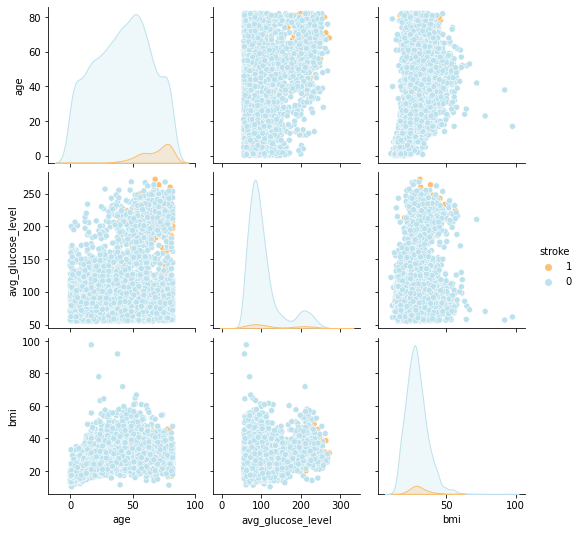

In [32]:
sns.pairplot(df.drop(['hypertension', 
                      'heart_disease', 
                      'id'], axis=1), 
             hue='stroke',
             palette='RdYlBu',
             hue_order=[1,0]);

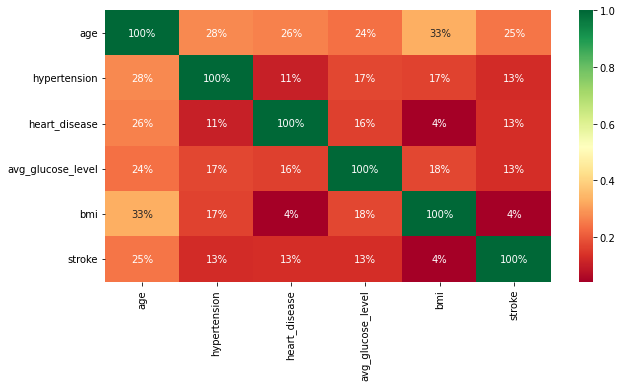

In [33]:
# Observando a correlação entre as variáveis
cor = df.drop('id', axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.0%', cmap='RdYlGn');
plt.show()

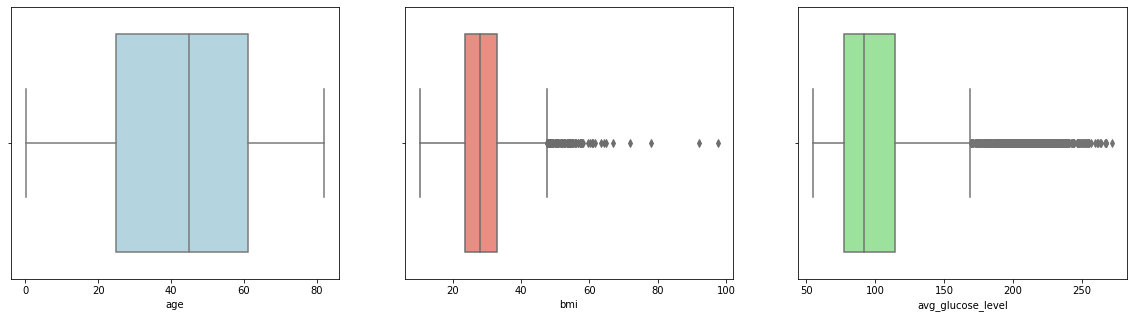

In [34]:
# Observando os outliers entre as variáveis numéricas
fig, ax = plt.subplots(1, 3, figsize=(20,5))

vars = ['age', 'bmi', 'avg_glucose_level']
colors = ['lightblue', 'salmon', 'lightgreen']

for var, i in zip(vars,
                  range(len(vars))):
    
    sns.boxplot(df[var],
                ax=ax[i],
                color=colors[i]);

Observamos abaixo a distribuição das variáveis numéricas e a contagem de classes entre as variáveis categóricas.

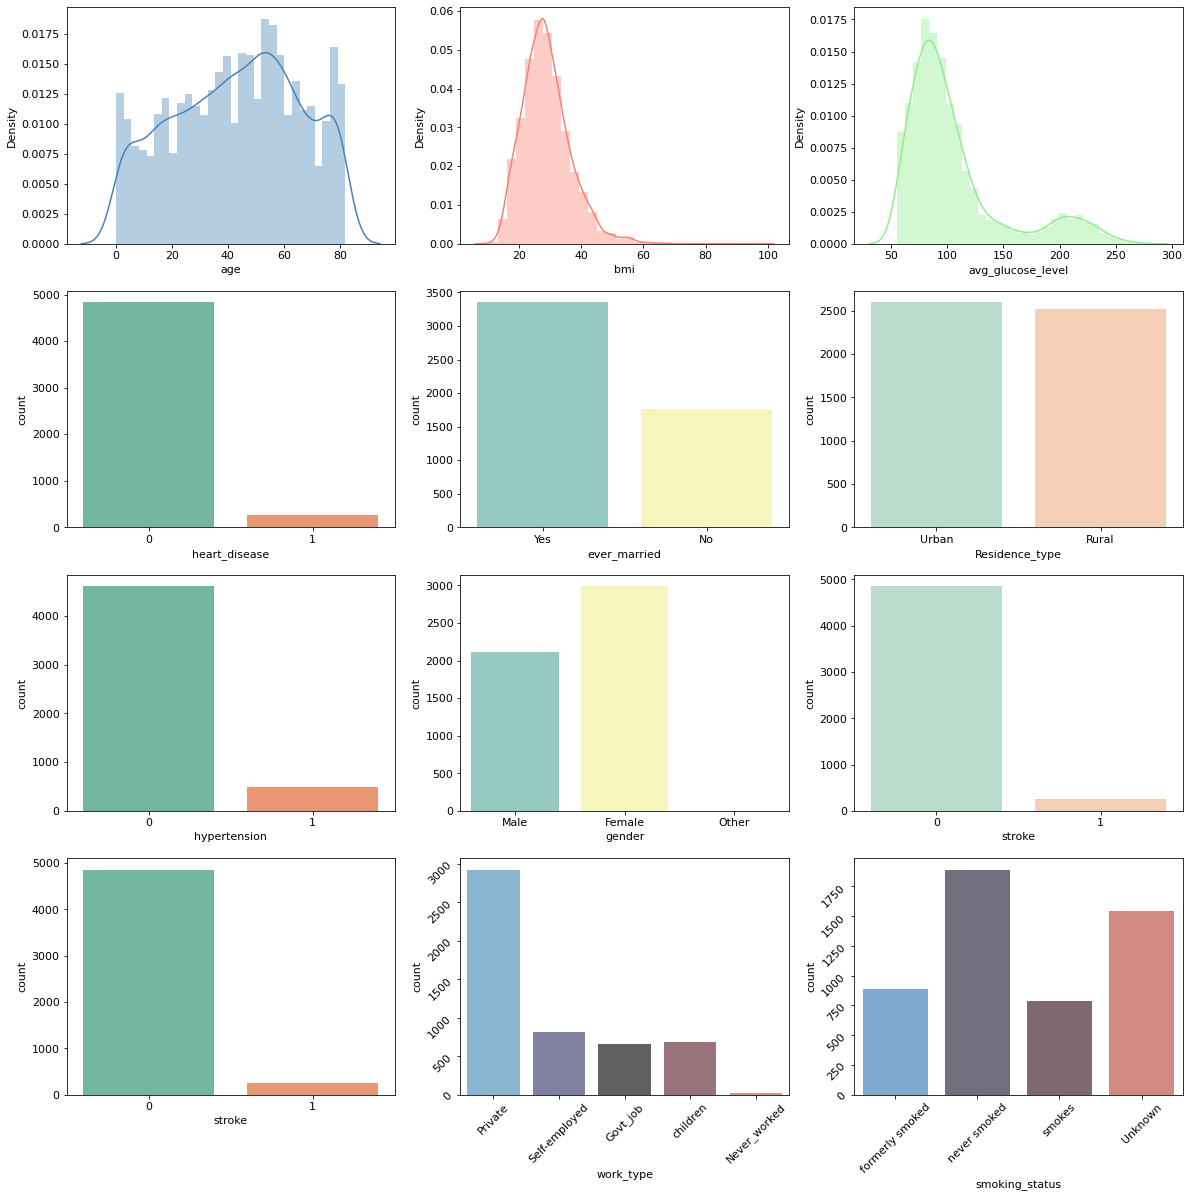

In [35]:
# Ordenando as variáveis para a grid de subplots
ordered_vars = [
    'age', 'bmi', 'avg_glucose_level', 
    'heart_disease', 'ever_married',
    'Residence_type', 'hypertension',
    'gender', 'stroke', 'stroke', 
    'work_type', 'smoking_status',
]

plt.rc('font', size=11)

# Criando os subplots com as variáveis em uma grid (4,3)
fig, ax = plt.subplots(4, 3, figsize=(20,20))

colors = ['steelblue', 'salmon', 'lightgreen']
palettes = ['Set2', 'Set3', 'Pastel2']

for variable, i in zip(ordered_vars, 
                       range(len(ordered_vars))):
    
    # Se a variável não for quantitativa (i > 2): countplot
    if i > 2:
        if i > 9:
            ax[i//3][i%3].tick_params(labelrotation=45)
            df[variable] = df[variable]
            
            sns.countplot(df[variable], 
                        palette='icefire',
                        alpha=.7,
                        ax=ax[i//3][i%3]);
            continue
        else:
            df[variable] = df[variable]
            
            sns.countplot(df[variable], 
                        palette=palettes[i%len(palettes)],
                        ax=ax[i//3][i%3]);
            continue

    # Caso a variável seja quantitativa (i < 2): distplot
    else:
        sns.distplot(df[variable], 
                     ax=ax[i//3][i%3], 
                     bins=30, 
                     color=colors[i%len(colors)]);
plt.show();

#### ANÁLISE MULTIVARIADA

##### Hipótese: `bmi` e `avg_glucose_level`
> *Pessoas com índices de massa corporal mais elevados tendem a possuir um maior nível médio de glicose no sangue?*

$H_1$: Pessoas com índices de massa corporal mais elevados tendem a possuir um maior nível médio de glicose no sangue. <br>
$H_A$: Pessoas com índices de massa corporal mais elevados não tendem a possuir um maior nível médio de glicose no sangue.

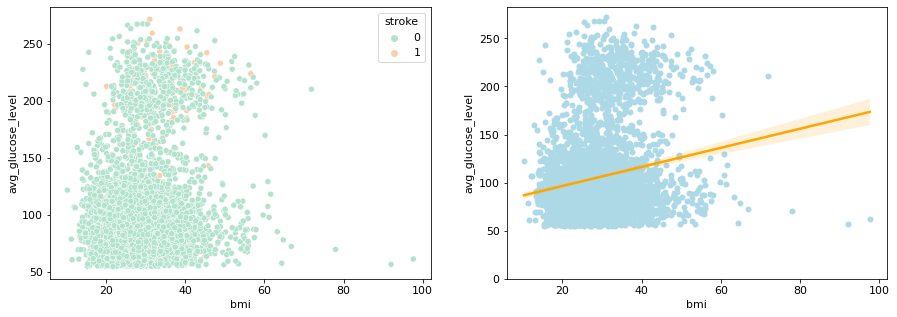

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(data=df,
                x='bmi',
                y='avg_glucose_level',
                hue='stroke',
                ax=ax[0],
                palette='Pastel2');

sns.regplot(data=df,
            x='bmi',
            y='avg_glucose_level',
            ax=ax[1],
            scatter_kws={'s':25, 'color':'lightblue', "alpha":1}, 
            line_kws={'color': 'orange','lw':2.5}).set(ylim=(0));

**Conclusão**: Aceitamos nossa hipótese nula, pois existe uma relação diretamente proporcional entre as variáveis.

##### `age`, `bmi` e `avg_glucose_level`

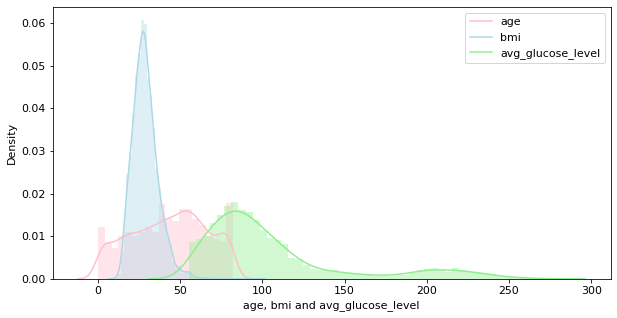

In [37]:
sns.distplot(df['age'], color='pink');
sns.distplot(df['bmi'], color='lightblue');
sns.distplot(df['avg_glucose_level'], color='lightgreen');

plt.legend(['age','bmi','avg_glucose_level']);
plt.xlabel('age, bmi and avg_glucose_level');

##### `hypertension`, `gender`, `heart_disease` e `stroke`
> *As pessoas que possuem hipertensão tendem a ter um AVC?* <br>
> *Homens tem mais probabilidade de ter um AVC?* <br>
> *Pessoas que já possuem ou possuíram problemas no coração são mais propensas a terem um AVC?*

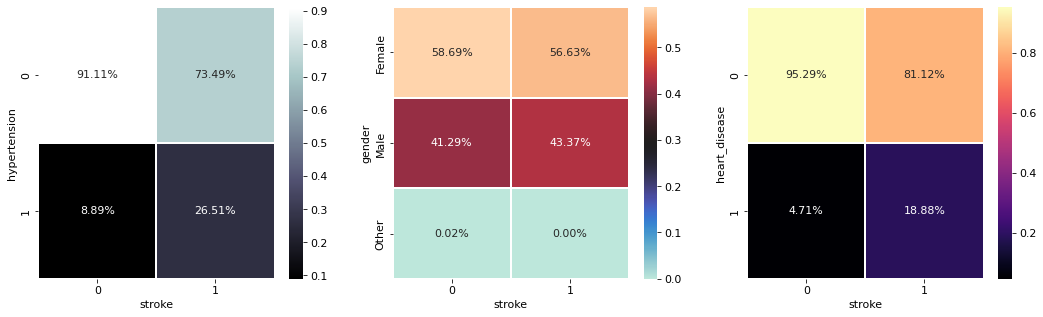

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

vars = ['hypertension', 'gender', 'heart_disease']
cmaps = ['bone', 'icefire', 'magma']

for var, i in zip(vars, range(3)):
    ctab = pd.crosstab(df[var], 
                   df['stroke'], 
                   normalize='columns')

    sns.heatmap(ctab, 
                annot=True, 
                fmt='.2%', 
                ax=ax[i],
                cmap=cmaps[i], 
                linewidths=1);

**Conclusões**: Indivíduos sem hipertensão são a maioria das pessoas que tiveram AVC. As mulheres representam a maior quantidade de casos de AVC. As pessoas que não possuem problemas no coração representam a maioria das que possui AVC.

##### `heart_disease` e `stroke`
> *As pessoas que possuem problemas no coração são mais propensas a terem um AVC?*

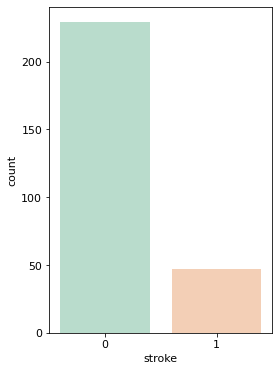

In [39]:
plt.figure(figsize=(4,6));
sns.countplot(df[df['heart_disease'] == 1]['stroke'],
              palette='Pastel2');

**Conclusão**: Dentre as pessoas que possuem problemas no coração, a maioria não teve um AVC.

## $3.$
Realize as etapas de pré-processamento e separação dos dados que julgar adequadas para o treinamento de um modelo de classificação binária sobre a variável alvo, utilizando todas as demais colunas do `DataFrame` como variáveis do modelo.

### ONE-HOT *ENCODING*

In [40]:
# Variáveis categóricas
categorical = ['gender', 'ever_married', 'work_type', 
               'Residence_type', 'smoking_status']

print(f'Shape de df antes do One-hot encoding: {df.shape}')

# Realizando One-hot encoding para variáveis categóricas
for i in categorical:
    df = pd.concat([df, pd.get_dummies(df[i], prefix=i)], axis=1)
    df.drop(i, axis=1, inplace=True)

print(f'Shape de df após One-hot encoding: {df.shape}')

Shape de df antes do One-hot encoding: (5110, 12)
Shape de df após One-hot encoding: (5110, 23)


### TRATAMENTO DE VALORES FALTANTES

In [41]:
# Remoção de valores faltantes
print(df.shape)

df.dropna(inplace=True)

print(df.shape)

(5110, 23)
(4909, 23)


### *FEATURE SELECTION*

#### Seleção Baseada em Filtro com `SelectKBest`

In [42]:
X_skb = df.drop(['stroke', 'id'], axis=1)
y_skb = df['stroke']

skb = SelectKBest(k='all')
skb.fit(X_skb, y_skb)

relevance_skb = pd.Series(data=skb.scores_, 
                          index=X_skb.columns.values)

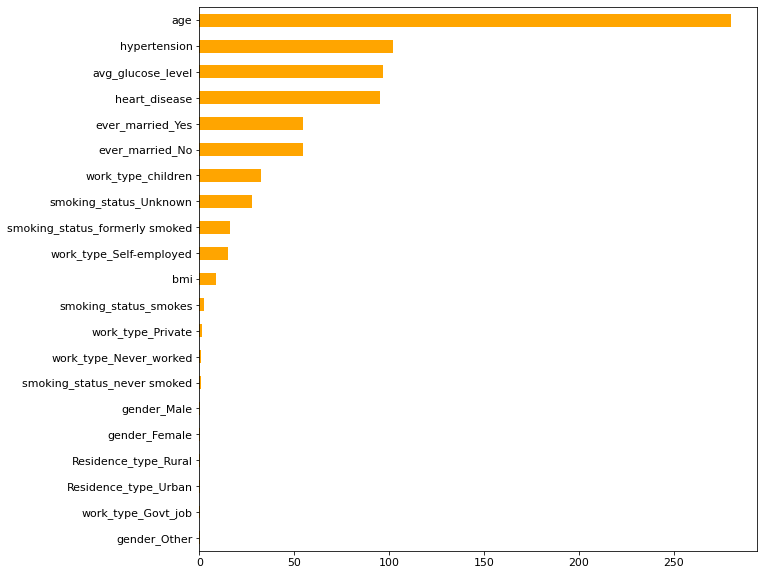

In [43]:
plt.figure(figsize=(10,10))
relevance_skb.sort_values() \
             .plot(kind='barh',
                   color='orange');

#### Seleção Baseada em Árvores com `RandomForestClassifier`

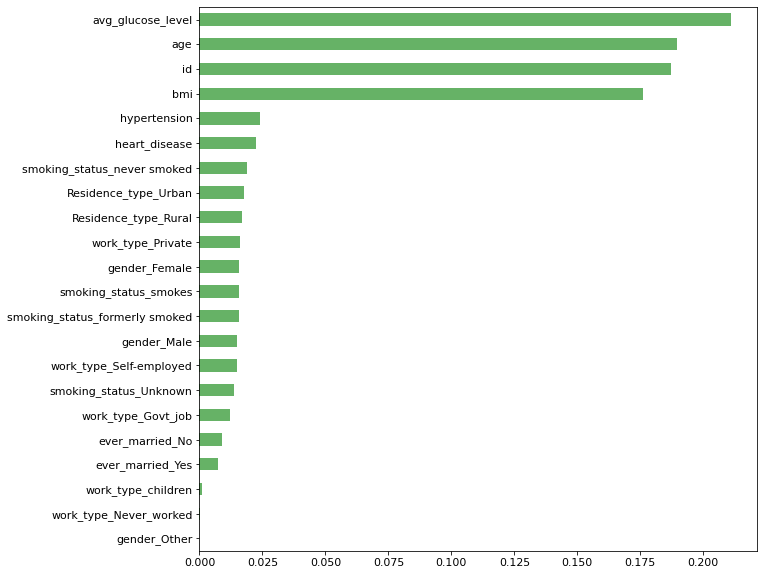

In [44]:
rffs = RandomForestClassifier()

rffs.fit(df.drop('stroke', axis=1), 
         df['stroke'])

rf_importances = rffs.feature_importances_
rf_importances = pd.Series(rf_importances, 
                           index=df.drop('stroke', axis=1) \
                                   .columns.values)

plt.figure(figsize=(10,10))
rf_importances.sort_values()\
              .plot(kind='barh', 
                    color='g', 
                    alpha=.6);

#### *Heatmap* com Correlações

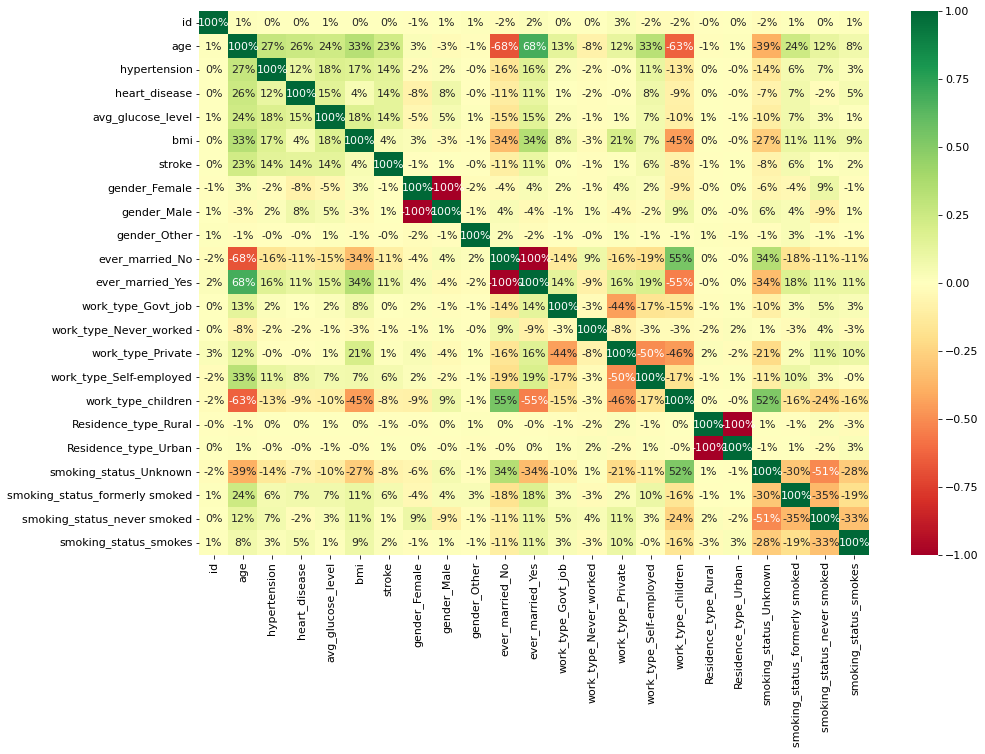

In [45]:
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, fmt='.0%', cmap='RdYlGn');
plt.show()

#### Selecionando as Features

In [46]:
# Removendo coluna 'id'
drop_set = [ 
    'id'  
]

df.drop(drop_set, axis=1, inplace=True)

Resolvi manter todas as *features* (com exceção do `id`), uma vez que, ainda que o impacto gerado no modelo seja baixo, obtive melhores resultados com a presença de todas elas.

### *DATAFRAME* COM *FEATURES* PARA *MACHINE LEARNING*

In [47]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [48]:
# Criando uma cópia do df completo e embaralhando os dados
df_full = df.copy()
df_full = df_full.sample(frac=1, 
                         random_state=42)

print(df_full.shape)

(4909, 22)


### SEPARAÇÃO ENTRE *FEATURES* E *TARGET*

In [49]:
# Features
X = df.drop(['stroke'], axis=1).values

# Target
y = df['stroke'].values

### *FEATURE ENGINEERING*

In [50]:
# df['age/bmi'] = df['age'] / df['bmi']
# df['age/avg_glucose_level'] = df['age'] / df['avg_glucose_level']
# df['bmi/avg_glucose_level'] = df['bmi'] / df['avg_glucose_level']

Foram testadas algumas criações de *features*, porém sem ganhos expressivos. É interessante, em uma etapa futura, focar nesse tópico para otimizar nosso modelo.

### SEPARAÇÃO ENTRE TREINO E TESTE

De maneira a utilizar as técnicas de *Machine Learning*, vamos separar os dados em treino e teste, para validar os modelos. Após validar os modelos, vamos treiná-los novamento com todos os dados disponíveis para treino, e então testá-los com os dados de teste.

In [51]:
# Separando conjunto de validação para dados de treino (75/25)
X_train, X_test, \
y_train, y_test = train_test_split(X, 
                                   np.reshape(y,(-1,1)), 
                                   test_size=0.25,
                                   random_state=42,
                                   shuffle=True)

print(f'Tamanho do DataFrame original: {len(X)}')
print(f'Tamanho do DataFrame de Treino (75%): {len(X_train)}')
print(f'Tamanho do DataFrame de Teste (25%): {len(X_test)}')

Tamanho do DataFrame original: 4909
Tamanho do DataFrame de Treino (75%): 3681
Tamanho do DataFrame de Teste (25%): 1228


### TRATAMENTO DE *OUTLIERS*

In [52]:
# Nenhum tratamento se demonstrou eficaz para os resultados finais

### BALANCEAMENTO DE CLASSES

In [53]:
# # Balanceamento nos dados

X_train, y_train = data_balancer(RandomUnderSampler \
                                    (random_state=42),
                                 X_train,
                                 y_train)

Testamos diferentes balanceamentos nos dados, porém mantemos o conjunto original, uma vez que trouxe mais resultados.

### AVALIANDO O *SHAPE* FINAL DOS DADOS DE TREINO E TESTE

Vamos avaliar o número de instâncias dos dados de treino e teste, pois a aplicação (se for o caso) de algoritmos de balanceamento de classes, deve ocorrer somente nos dados de treino. Nesse caso, o `shape` dos dados de teste devem ser iguais aos originais.

In [54]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(292, 21)
(292,)
(1228, 21)
(1228, 1)


In [55]:
pd.Series(np.reshape(y_test,(1,-1))[0]).value_counts()

0    1165
1      63
dtype: int64

## $4.$
Apresente um gráfico $2D$ de dispersão dos dados de teste em relação à variável alvo. Neste procedimento as colunas de variáveis devem ser transformadas apenas em duas, formando os eixos $x$ e $y$ do gráfico. Para amostras com valor de `TARGET` = `0` utilizar a cor azul; já para amostras de `TARGET` = `1` utilizar vermelho.

### *t-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING*: `t-SNE`

Vamos começar com o `t-SNE`, destinado à visualização de dados, reduzindo as colunas para 2 componentes.

In [56]:
tsne = TSNE(n_components=2,
            perplexity=40,
            n_iter=1000)

X_transformado = tsne.fit_transform(df_full.drop('stroke', axis=1))

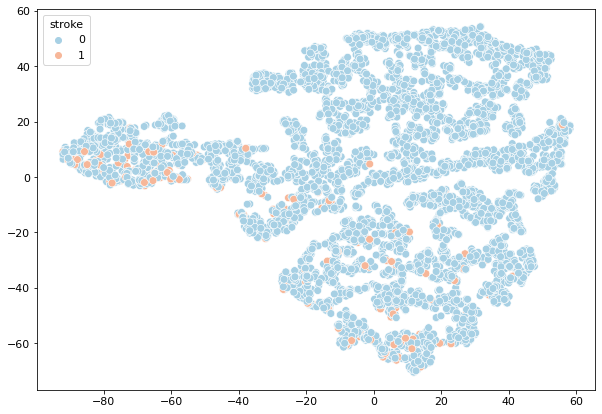

In [57]:
plt.figure(figsize=(10,7))
sns.scatterplot(X_transformado[:,0], 
                X_transformado[:,1],
                hue=df_full['stroke'],
                s=60,
                palette='RdBu_r')
plt.show();

A visualização dos pontos com `stroke` = `1` está um pouco complicada devido à sobreposição dos demais elementos, portanto, vamos recriar esse gráfico destacando os pontos que desejamos.

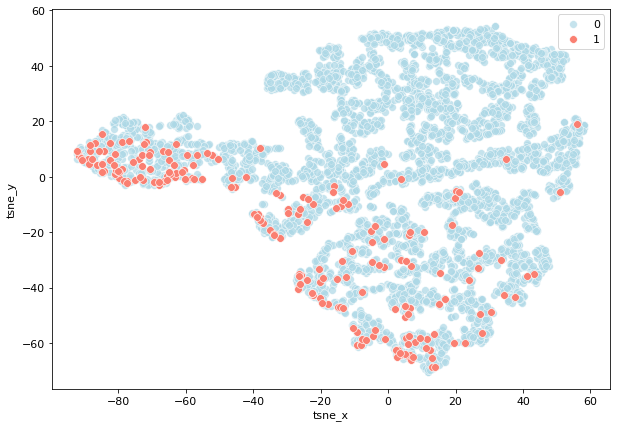

In [58]:
df_tsne = pd.DataFrame()

df_tsne["stroke_alpha"] = np.where(df_full['stroke'] == 1, .9, .6)
df_tsne['tsne_x'] = X_transformado[:,0]
df_tsne['tsne_y'] = X_transformado[:,1]

plt.figure(figsize=(10,7))

# Plotando os pontos com stroke = 0
ax = sns.scatterplot(x='tsne_x',
                     y='tsne_y',
                     data=df_tsne[df_tsne['stroke_alpha'] == .6],
                     color='lightblue',
                     s=60, 
                     alpha=.7)

# Plotando os pontos com stroke = 1
sns.scatterplot(x="tsne_x", 
                y="tsne_y", 
                data=df_tsne[df_tsne['stroke_alpha'] == .9],
                color='salmon', 
                alpha=1.0,
                s=60,
                ax=ax);

plt.legend(['0', '1']);
plt.show();

Notamos uma predominância de pontos com `stroke` = `1` do lado esquerdo inferior do nosso gráfico.

### *PRINCIPAL COMPONENT ANALYSIS*: `PCA`

Vamos seguir agora com o `PCA`, reduzindo as colunas para 2 componentes principais.

In [59]:
scaler = StandardScaler()
df_pca = pd.DataFrame()

pca = PCA(n_components=2, 
          random_state=42). \
          fit_transform(scaler \
                        .fit_transform(df_full.drop('stroke',
                                                    axis=1)))

df_pca['PCA'] = np.reshape(pca,(1,-1))[0]
df_pca['stroke'] = df_full['stroke']

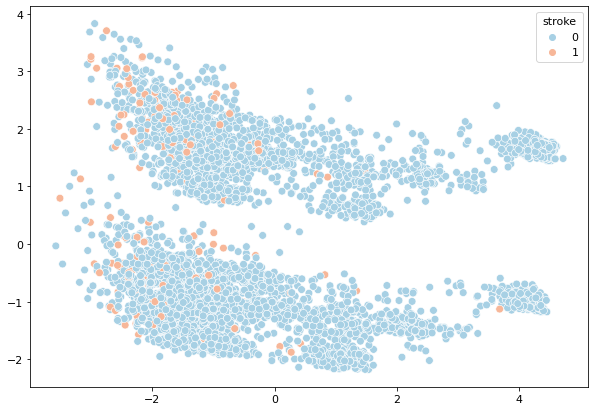

In [60]:
plt.figure(figsize=(10,7))

sns.scatterplot(data=df_full,
                x=pca[:,0], 
                y=pca[:,1],
                hue='stroke',
                s=60,
                palette='RdBu_r');

Da mesma forma que o gráfico inicial do `t-SNE`, notamos algumas sobreposições de elementos que dificultam a nossa visualização dos pontos com `stroke` = `1`, portanto vamos recriar o gráfico, assim como fizemos no primeiro exemplo.

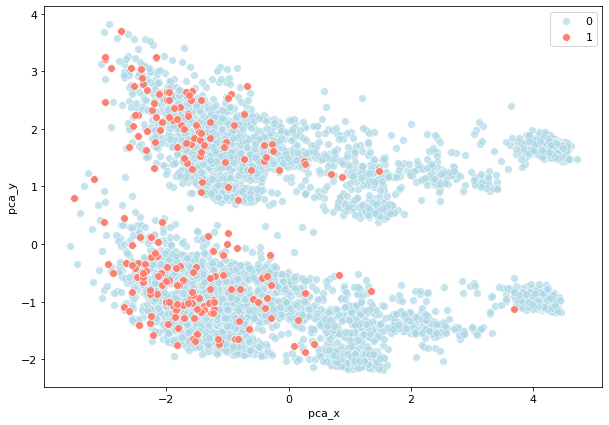

In [61]:
df_pca = pd.DataFrame()

df_pca["stroke_alpha"] = np.where(df_full['stroke'] == 1, .9, .6)
df_pca['pca_x'] = pca[:,0]
df_pca['pca_y'] = pca[:,1]

plt.figure(figsize=(10,7))

# Plotando os pontos com stroke = 0
ax = sns.scatterplot(x='pca_x',
                     y='pca_y',
                     data=df_pca[df_pca['stroke_alpha'] == .6],
                     color='lightblue',
                     s=60, 
                     alpha=.7)

# Plotando os pontos com stroke = 1
sns.scatterplot(x="pca_x", 
                y="pca_y", 
                data=df_pca[df_pca['stroke_alpha'] == .9],
                color='salmon', 
                alpha=1.0,
                s=60,
                ax=ax);

plt.legend(['0', '1']);
plt.show();

Também observamos uma predominância de pontos com `stroke` = `1` na região esquerda da figura.

## $5.$
A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em **árvore**. Utilize uma técnica de otimização de hiperparâmetros a sua escolha.

Abaixo, realizei uma seleção de modelos, entre alguns modelos baseados em árvore, partindo de cada modelo com seus parâmetros *defaut*. Para validação, foi realizada uma validação cruzada ($kfold$) com 10 *folds* nos dados de treino. Para computação de *scores*, foi utilizado o *recall* e uma função que calcula o KS, retornando a média dessas métricas ao final.

### *MODEL SELECTION* COM DADOS DE TREINO PARA VALIDAÇÃO

LGBMClassifier

Mean accuracy: 0.69183908045977
Mean KS: 58.09848484848485

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       146
           1       0.68      0.71      0.70       146

    accuracy                           0.69       292
   macro avg       0.69      0.69      0.69       292
weighted avg       0.69      0.69      0.69       292



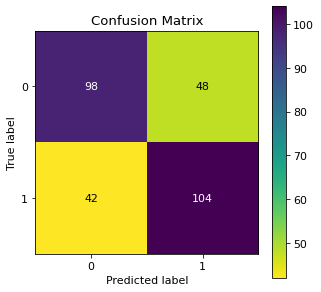


----------------------------------------------------------------------

XGBClassifier

Mean accuracy: 0.7054022988505747
Mean KS: 58.724540981893924

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       146
           1       0.67      0.70      0.68       146

    accuracy                           0.68       292
   macro avg       0.68      0.68      0.68       292
weighted avg       0.68      0.68      0.68       292



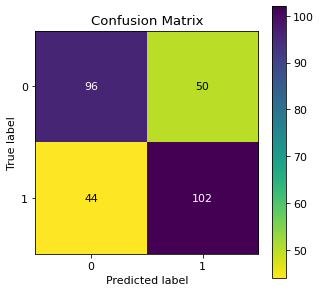


----------------------------------------------------------------------

RandomForestClassifier

Mean accuracy: 0.7539080459770113
Mean KS: 58.30624200361043

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       146
           1       0.74      0.77      0.75       146

    accuracy                           0.75       292
   macro avg       0.75      0.75      0.75       292
weighted avg       0.75      0.75      0.75       292



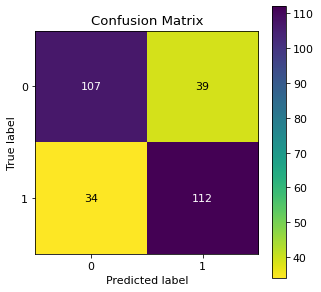

In [62]:
tree_models = {
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}

models_preds = []
for model_name, model, i in zip(list(tree_models.keys()),
                                list(tree_models.values()),
                                range(len(tree_models))):
    scores, \
    ks_scores, \
    preds = ml_pipeline(model=model,
                        model_name=model_name,
                        train=(X_train, y_train),
                        cv=10,
                        return_vals=True)
    
    models_preds.append(preds)
    
    if i < len(tree_models)-1:
        print('-'*70, end='\n\n')

Notamos que os modelos apresentam uma acurácia elevada, devido ao desbalanceamento. Nesse caso, vamos nos basear no valor de KS para escolhr um modelo; junto do KS, vamos ainda realizar o teste wilcoxon, de maneira a entender se os classificadores são diferentes (pra além do valor de KS).

### APLICANDO TESTE DE *WILCOXON* NOS RESULTADOS DA VALIDAÇÃO CRUZADA

Para os resultados das classificações obtidas de cada modelo na validação cruzada, será realizada a comparação entre os pares de indutores através do
teste estatístico de *Wilcoxon*. As hipóteses a serem avaliadas são:

$H_0$: Os classificadores se comportam de maneira igual. <br>
$H_A$: Existe diferença significativa entre o comportamento dos classificadores. <br>

**OBS**: Diferença no sentido de um ser melhor que o outro, em termos de acurácia.


In [63]:
# 1º Teste: LightGBM vs XGBoost (95%)
stat, p = wilcoxon(models_preds[0], models_preds[1])
print(p)

if p > 0.05:
    print('Os classificadores LightGBM e XGBoost não apresentam diferença significativa (H1)!')
else:
    print('Os classificadores LightGBM e XGBoost apresentam diferença significativa (HA)!')

1.0
Os classificadores LightGBM e XGBoost não apresentam diferença significativa (H1)!


In [64]:
# 2º Teste: LightGBM vs RandomForest (95%)
stat, p = wilcoxon(models_preds[0], models_preds[2])
print(p)

if p > 0.05:
    print('Os classificadores LightGBM e RandomForest não apresentam diferença significativa (H1)!')
else:
    print('Os classificadores LightGBM e RandomForest apresentam diferença significativa (HA)!')

0.8758960579229409
Os classificadores LightGBM e RandomForest não apresentam diferença significativa (H1)!


In [65]:
# 3º Teste: XGBoost vs RandomForest (95%)
stat, p = wilcoxon(models_preds[1], models_preds[2])
print(p)

if p > 0.05:
    print('Os classificadores XGBoost e RandomForest não apresentam diferença significativa (H1)!')
else:
    print('Os classificadores XGBoost e RandomForest apresentam diferença significativa (HA)!')

0.8694170607412391
Os classificadores XGBoost e RandomForest não apresentam diferença significativa (H1)!


### *MODEL SELECTION* COM DADOS DE TESTE

Agora serão realizadas as validações com os dados de teste para os modelos criados. Serão realizados os treinamentos com os dados de treino, e a testagem com o conjunto de teste. Ao fim, será realizada uma análise levando em consideração a etapa de validação e os testes realizados, de maneira a selecionar um dos modelos de árvore criados. Para esse modelo escolhido, será efetuada uma técnica de otimização de hiperparâmetros.

LGBMClassifier

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1165
           1       0.12      0.86      0.22        63

    accuracy                           0.68      1228
   macro avg       0.56      0.77      0.51      1228
weighted avg       0.94      0.68      0.77      1228

KS: 55.415219020369236



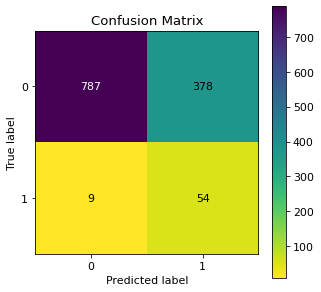


----------------------------------------------------------------------

XGBClassifier

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      1165
           1       0.13      0.89      0.23        63

    accuracy                           0.70      1228
   macro avg       0.56      0.79      0.52      1228
weighted avg       0.95      0.70      0.78      1228

KS: 58.41814837522992



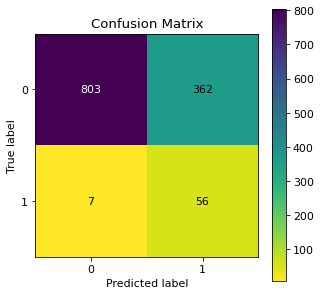


----------------------------------------------------------------------

RandomForestClassifier

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1165
           1       0.14      0.89      0.24        63

    accuracy                           0.71      1228
   macro avg       0.56      0.79      0.53      1228
weighted avg       0.95      0.71      0.79      1228

KS: 58.76013352408202



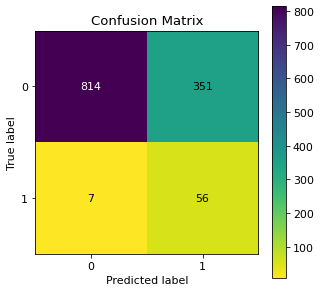

In [66]:
for model_name, model, i in zip(list(tree_models.keys()),
                                list(tree_models.values()),
                                range(len(tree_models))):
    ml_pipeline(model=model,
                model_name=model_name,
                train=(X_train, y_train),
                test=(X_test, y_test))
        
    if i < len(tree_models)-1:
        print('-'*70, end='\n\n')

**Conclusão**: Irei escolher o `RandomForestClassifier`. Os valores de KS entre os modelos estão próximos, e o teste de *wilcoxon* indicou que em validação os modelos `RandomForest` e `XGBoost` não apresentam diferença significativa.

### OTIMIZAÇÃO *BAYESIANA* PARA `RandomForest` EM TESTE

Foi utilizada a função `ks_score_func` na otimização, de maneira que computamos o KS para otimizar os parâmetros. A otimização foi realizada em cross validation (5 *folds*), e a testagem exibida na tela com os dados de teste.

Best Params: {
    "max_depth": 3,
    "n_estimators": 9800
}

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      1165
           1       0.12      0.89      0.22        63

    accuracy                           0.67      1228
   macro avg       0.56      0.78      0.51      1228
weighted avg       0.95      0.67      0.76      1228

KS: 61.46740241160842



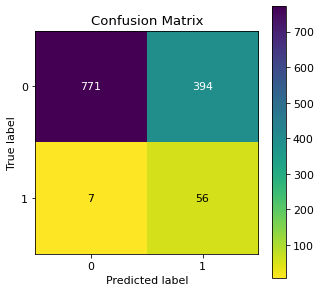

In [67]:
clf = RandomForestClassifier(random_state=42)

# Hiperparâmetros RandomForestClassifier
space = {
    'n_estimators': Integer(9000, 10100),
    'max_depth': Integer(1,5),
    #'criterion': ('gini', 'entropy'),
    #'min_samples_split': Integer(1,20),
    #'min_samples_leaf': Integer(1,20),
    #'class_weight': ('balanced', 'balanced_subsample')
}

tm_best_params = bayesian_optimization(clf, 
                                       space,
                                       n_iter=5,
                                       train=(X_train, y_train),
                                       test=(X_test, y_test),
                                       score_func=ks_score_func)

### `RandomForestClassifier` COM DADOS DE TESTE

Utilizando os parâmetros obtidos na otimização *bayesiana* para testar o modelo.

RandomForestClassifier

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      1165
           1       0.12      0.89      0.22        63

    accuracy                           0.67      1228
   macro avg       0.56      0.78      0.51      1228
weighted avg       0.95      0.67      0.76      1228

KS: 61.46740241160842



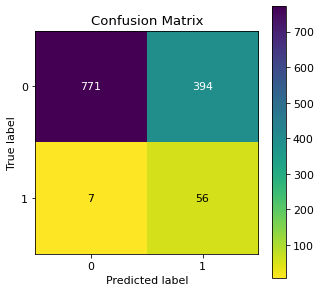

In [68]:
tm = RandomForestClassifier(**tm_best_params,
                            random_state=42)
tm, \
tm_ks, \
tm_probs_true, \
tm_preds = ml_pipeline(model=tm,
                       model_name='RandomForestClassifier',
                       train=(X_train, y_train),
                       test=(X_test, y_test),
                       return_vals=True)

Realizando a plotagem da importância relativa a cada *feature* para o modelo criado.

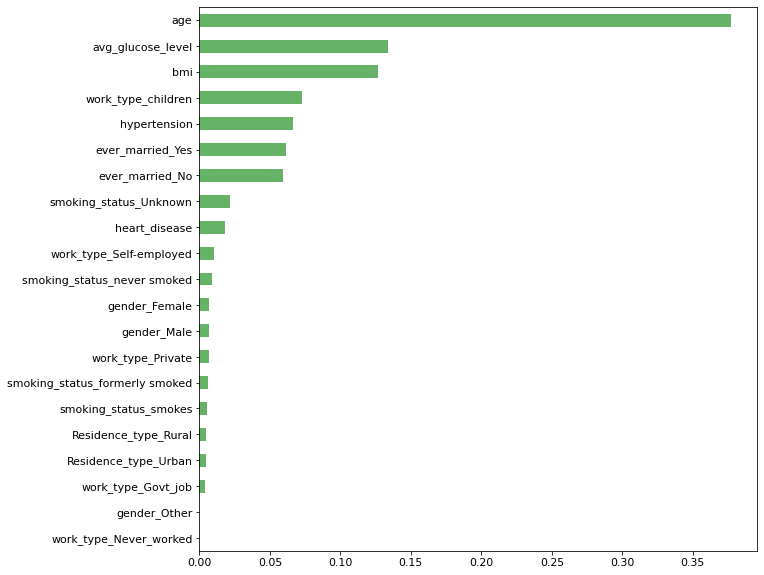

In [69]:
relevance = pd.Series(data=tm.feature_importances_, 
                      index=df.drop('stroke', axis=1) \
                              .columns.values)

plt.figure(figsize=(10,10))
relevance.sort_values() \
         .plot(kind='barh',
               color='green',
               alpha=.6);

## $6.$
A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em **redes neurais**. Utilize uma técnica de otimização de hiperparâmetros ou busca automática de rede a sua escolha.

### `MLPClassifier` COM DADOS DE TREINO PARA VALIDAÇÃO

Para validar o modelo, foi realizada uma validação cruzada (10 *folds*) nos dados de treino.

MLP

Mean accuracy: 0.7190804597701149
Mean KS: 61.30332249449897

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       146
           1       0.74      0.77      0.75       146

    accuracy                           0.75       292
   macro avg       0.75      0.75      0.75       292
weighted avg       0.75      0.75      0.75       292



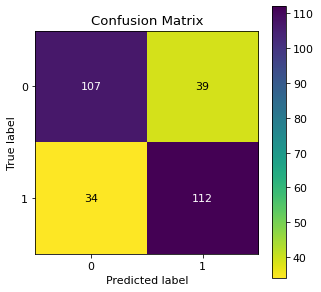

In [70]:
# Balanceamento de classes
X_train_b, y_train_b = data_balancer(SMOTE(random_state=42),
                                     X_train,
                                     y_train)

# Normalização nos dados
X_train_transf = data_normalizer(MinMaxScaler \
                                    (feature_range=(-2,2)), 
                                 X_train_b)

mlp = MLPClassifier(random_state=42)

ml_pipeline(model=mlp,
            model_name='MLP',
            train=(X_train_transf, y_train_b),
            test=(X_test, y_test),
            cv=10,
            return_vals=False)

Os dados utilizados no MLP foram balanceados, dessa forma notamos um valor de KS elevado, o que é natural, uma vez que o modelo em validação está separando muito bem as duas classes.

### OTIMIZAÇÃO *BAYESIANA* PARA `MLPClassifier` EM TESTE

Foi utilizada a função `ks_score_func` na otimização, de maneira que computamos o KS para otimizar os parâmetros. A otimização foi realizada em cross validation (5 *folds*), e a testagem exibida na tela com os dados de teste.

Best Params: {
    "max_iter": 9451
}

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1165
           1       0.05      1.00      0.10        63

    accuracy                           0.05      1228
   macro avg       0.53      0.50      0.05      1228
weighted avg       0.95      0.05      0.01      1228

KS: 0.08583690987124463



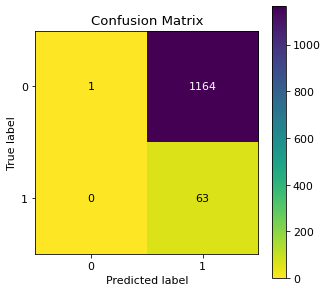

In [71]:
clf = MLPClassifier(random_state=42)

space = {
    'max_iter': Integer(9000, 10100),
}

# solver='sgd', 
# activation='relu',
# hidden_layer_sizes=(100,),
# batch_size='auto',
# learning_rate='constant',
# max_iter=1000,
# early_stopping=False,
# alpha=1e-5,

mlp_best_params = bayesian_optimization(clf, 
                                        space,
                                        n_iter=5,
                                        train=(X_train_transf, y_train_b),
                                        test=(X_test, y_test),
                                        score_func=ks_score_func,
                                        predict_proba=True)

Notamos uma redução em relação ao KS em validação, uma vez que agora não possuímos amostras oriundas do SMOTE.

### `MLPClassifier` COM DADOS DE TESTE

Utilizando os parâmetros obtidos na otimização *bayesiana* para testar o modelo.

MLP

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1165
           1       0.05      1.00      0.10        63

    accuracy                           0.05      1228
   macro avg       0.53      0.50      0.05      1228
weighted avg       0.95      0.05      0.01      1228

KS: 0.08583690987124463



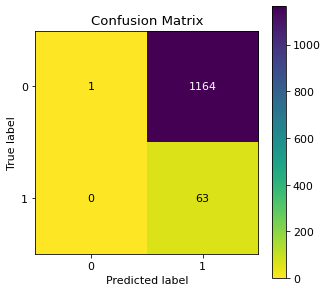

In [72]:
mlp = MLPClassifier(**mlp_best_params,
                    random_state=42)
mlp, \
mlp_ks, \
mlp_probs_true, \
mlp_preds = ml_pipeline(mlp,
                        model_name='MLP',
                        train=(X_train_transf, y_train_b),
                        test=(X_test, y_test),
                        return_vals=True)

## $7.$
A partir dos dados da etapa 3, treine um modelo utilizando qualquer técnica a sua escolha, desde que seja diferente das utilizadas nas questões 5 e 6.

### `LinearSVC` COM DADOS DE TREINO PARA VALIDAÇÃO

Para validar o modelo, foi realizada uma validação cruzada (10 *folds*) nos dados de treino.

LinearSVC

Mean accuracy: 0.7441379310344827
Mean KS: 63.948392379893924

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       146
           1       0.74      0.75      0.75       146

    accuracy                           0.75       292
   macro avg       0.75      0.75      0.75       292
weighted avg       0.75      0.75      0.75       292



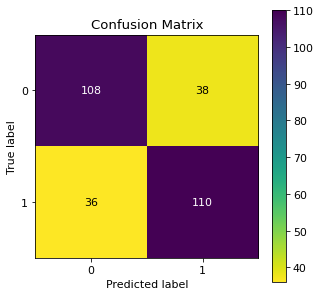

In [73]:
lsvc = LinearSVC(random_state=42)

# LinearSVC não tem predict_proba, então utilizamos um modelo
# para poder utilizar essa função
lsvc = CalibratedClassifierCV(lsvc)

ml_pipeline(model=lsvc,
            model_name='LinearSVC',
            train=(X_train, y_train),
            test=(X_test, y_test),
            cv=10,
            return_vals=False)

### OTIMIZAÇÃO *BAYESIANA* PARA `LinearSVC` EM TESTE

O modelo `LinearSVC` não possui a função `predict_proba`, então foi utilizada a função `f1`, para `f1-score` na otimização dos hiperparâmetros. A otimização foi realizada nos dados de treino e os valores exibidos foram obtidos a partir dos dados de teste.

Best Params: {
    "max_iter": 9880
}

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1165
           1       0.15      0.86      0.26        63

    accuracy                           0.75      1228
   macro avg       0.57      0.80      0.55      1228
weighted avg       0.95      0.75      0.82      1228



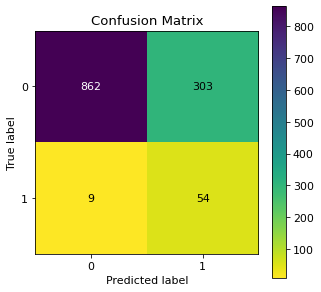

In [74]:
clf = LinearSVC(random_state=42)

# Hiperparâmetros LinearSVC
space = {
    'max_iter': Integer(9000, 10100),
    # 'penalty': ('l1', 'l2'),
    # 'loss': ('hinge', 'squared_hinge'),
    # 'dual': (True, False),
    # 'multi_class': ('ovr', 'crammer_singer')
}

lsvc_best_params = bayesian_optimization(clf, 
                                         space,
                                         n_iter=5,
                                         train=(X_train, y_train),
                                         test=(X_test, y_test),
                                         score_func='f1',
                                         predict_proba=False)

### `LinearSVC` COM DADOS DE TESTE

Utilizando os parâmetros obtidos na otimização *bayesiana* para testar o modelo.

LinearSVC

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1165
           1       0.15      0.92      0.25        63

    accuracy                           0.72      1228
   macro avg       0.57      0.82      0.54      1228
weighted avg       0.95      0.72      0.80      1228

KS: 63.780911506233394



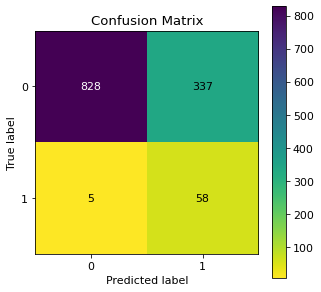

In [75]:
lsvc = LinearSVC(**lsvc_best_params,
                 random_state=42)

lsvc = CalibratedClassifierCV(lsvc)

lsvc, \
lsvc_ks, \
lsvc_probs_true, \
lsvc_preds = ml_pipeline(model=lsvc,
                         model_name='LinearSVC',
                         train=(X_train, y_train),
                         test=(X_test, y_test),
                         return_vals=True)

### *EXTRA*: `StackingClassifier` COM DADOS DE TESTE

Utilizando um meta-classificador para tentar combinar os três modelos de cada etapa (5, 6 e 7) e criar um classificador robusto.

StackingClassifier

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1165
           1       0.13      0.94      0.23        63

    accuracy                           0.68      1228
   macro avg       0.56      0.80      0.51      1228
weighted avg       0.95      0.68      0.77      1228

KS: 64.7237550241842



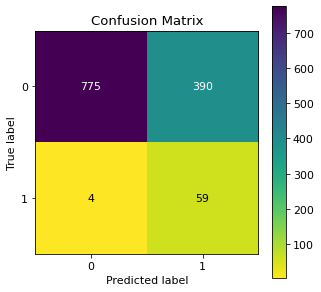

In [76]:
# Tentando juntar os três modelos e criar algo 
# com um meta-classificador

estimators = [
    ('RandomForest', tm),
    ('LinearSVC', lsvc),
    ('MLP', mlp),
]

stk = StackingClassifier(estimators=estimators,
                         final_estimator=tm)

stk, \
stk_ks, \
stk_probs_true, \
stk_preds = ml_pipeline(model=stk,
                        model_name='StackingClassifier',
                        train=(X_train, y_train),
                        test=(X_test, y_test),
                        return_vals=True)

## $8.$
Compare os resultados dos três modelos acima e justifique a métrica escolhida para avaliação.

<p align="justify">
A principal métrica escolhida foi o <b><i>Kolmogorov-Smirnov</i></b> (KS), métrica que avalia o quão bem o modelo distingue entre as classes. A métrica da acurácia, para esse problema, não avalia tão bem os modelos, uma vez que as classes são desbalanceadas e na classificação o modelo gera apenas <i>output</i> para as classes de maior predominância. De maneira a avaliar melhor e comparar os resultados, vamos focar no KS, uma vez que esse é calculado através das probabilidades geradas pelo modelo, para a classe alvo, nos fornecendo um valor mais preciso. Também podemos, a partir do KS, definir um limiar (<i>threshold</i>) para classificar as classes, mesmo com o desbalanceamento. Como métrica secundária (mas também importante), vamos plotar as curvas ROC dos modelos e seus respectivos valores de AUC, de maneira a encontrar também o <i>threshold</i> mencionado. Por fim, após definir o <i>threshold</i>, vamos avaliar a acurácia do modelo.
</p>

### ROC E AUC

In [77]:
models_names = [
    'Random Forest', 
    'LinearSVC', 
    'MLP',
    'StackingClassifier'
]
                
models_probs = [
    tm_probs_true,
    lsvc_probs_true,
    mlp_probs_true,
    stk_probs_true
]

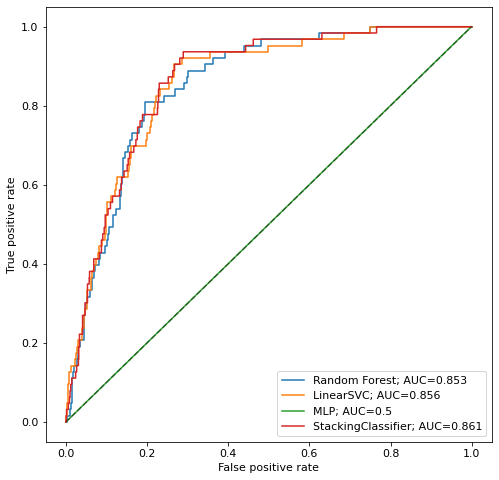

In [78]:
# Gerando os valores de tpr, fpr e auc para os modelos
tprs, fprs, aucs = [], [], []
for probs, model_name in zip(models_probs, models_names):

    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)

    [array.append(i) for array, i in zip([tprs, fprs, aucs], 
                                         [tpr, fpr, auc])]

# Plotando as curvas ROC e valores AUC para os modelos
plt.figure(figsize=(8,8));

for i in range(len(models_names)):
    plt.plot(fprs[i], 
             tprs[i], 
             label=f'{models_names[i]}; ' \
                   f'AUC={str(round(aucs[i],3))}');

plt.plot([0, 1], 
         [0, 1], 
         ls="--", 
         color='black', 
         alpha=.4);

plt.legend(loc=4);
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');
plt.show();

### *KOLMOGOROV-SMIRNOV* (KS)

In [79]:
print(f'KS RandomForest: {tm_ks}')
print(f'KS LinearSVC: \t {lsvc_ks}')
print(f'KS MLP: \t {mlp_ks}')
print(f'KS Stacking: \t {stk_ks}')

KS RandomForest: 61.46740241160842
KS LinearSVC: 	 63.780911506233394
KS MLP: 	 0.08583690987124463
KS Stacking: 	 64.7237550241842


## $9.$
Escolha um dos três modelos acima. Supondo que um falso negativo tenha um custo muito maior do que falso positivo, e sabendo que a predição da variável alvo é realizada entre `0` e `1`, mesmo em modelos de classificação binária, selecione um limiar para definir se uma pessoa terá ou não um derrame e justique a sua escolha.

**Escolha do Modelo**: Notamos muita semelhança nos valores de KS e AUC entre o `RandomForest`, `LinearSVC` e `StackingClassifier`. Contudo, apenas o primeiro modelo mencionado possui o suporte da biblioteca `shap`, para análise SHAP. Dessa forma, iremos escolher o `RandomForestClassifier`, uma vez que os três modelos apresentaram métricas muito próximas. Ademais, o `RandomForest` também apresentou boa capacidade de atingir valores elevados de *recall*, o que está alinhado com nossos objetivos.

### DEFININDO UM *THRESHOLD* PARA O MODELO

Threshold=0.5905, 
G-Mean=0.8073



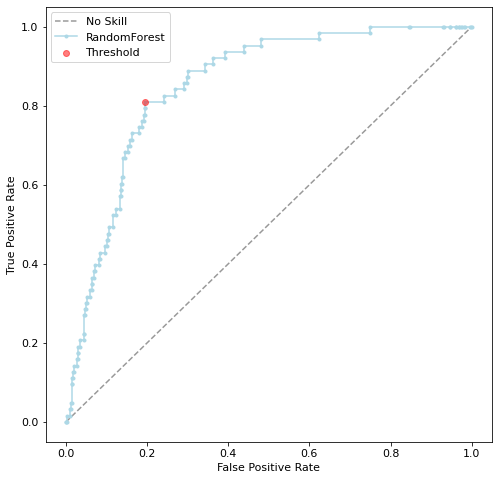

In [80]:
# Calculando o threshold para o modelo escolhido
fpr, tpr, thresholds = roc_curve(y_test, tm_probs_true)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

print(f'Threshold={round(thresholds[ix],4)}, \n' \
      f'G-Mean={round(gmeans[ix],4)}', end='\n\n')

plt.figure(figsize=(8,8));

plt.plot([0,1], [0,1], 
         linestyle='--',
         color='black', 
         alpha=.4, 
         label='No Skill')

plt.plot(fpr, 
         tpr, 
         marker='.', 
         color='lightblue',
         label='RandomForest')

plt.scatter(fpr[ix], 
            tpr[ix], 
            marker='o', 
            color='red',
            alpha=.5,
            zorder=3, 
            label='Threshold')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [81]:
# Valor do threshold
threshold = thresholds[ix]
print(threshold)

0.5904687601321887


O *threshold* definido para o `RandomForest` foi de `0.04`. Valores menores que esse limiar serão classificados como pertencentes à classe `0` (sem AVC). Valores maiores ou iguais a esse limiar serão considerados da classe `1` (possui AVC). Para gerar essas novas classificações, vamos utilizar as probabilidades de AVC (classe 1) geradas pelo modelo.

**Justificativa**: O *threshold* foi definido de maneira a otimizar as predições da classe 1 (evidenciadas pelo maior valor de *recall* nas classificações); nesse sentido, o valor escolhido é o ponto da curva ROC onde encontramos esse equilíbrio, no caso entre o *False Positive Rate* e o *True Positive Rate*. Dessa maneira, otimizamos nossos resultados, para os objetivos desejados, nesse caso diminuir a ocorrência de falsos negativos.

### SALVANDO O MODELO NO DISCO

In [82]:
# Salvando o modelo
model_name = 'RandomForestClassifier.sav'
pickle.dump(tm, open(model_name, 'wb'))

## $10.$
Realize uma análise de "*Equal Error Rate*" e uma análise "**SHAP**" para o modelo acima e descreva suas conclusões.

### *EQUAL ERROR RATE*

Temos que a intersecção entre as curvas FAR (*false acceptance rate*) e FRR (*false rejection rate*) representa o *equal error rate* (EER). Nesse sentido, o EER é o ponto em que a *false identification rate* e a *false rejection rate* são minimizadas. É evidente que menores valores de EER estão associados a um melhor modelo.



In [83]:
# Calculando o EER
fpr, tpr, thresholds = roc_curve(y_test, 
                                 tm_probs_true, 
                                 pos_label=1)
fnr = 1 - tpr
eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]

EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.19484978540772532

O EER do modelo criado é `0.2`, indicando que o modelo possui uma boa relação entre as curvas de *false acceptance rate* e *false rejection rate*, ou seja, minimizamos a chance de errar (nesse caso, mais especificamente, minimizamos os falsos negativos durante o treinamento do modelo).

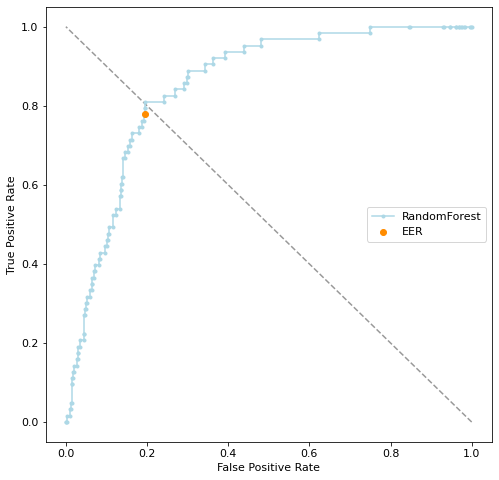

In [84]:
# Plotando o scatter do EER
plt.figure(figsize=(8,8));

plt.plot([1,0], [0,1], 
         linestyle='--',
         color='black', 
         alpha=.4)

plt.plot(fpr, 
         tpr, 
         marker='.', 
         color='lightblue',
         label='RandomForest')

plt.scatter(round(EER,3), 
            0.780, 
            marker='o', 
            color='darkorange', 
            zorder=3,
            label='EER')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### SHAP

In [85]:
# OBS: Os modelos 'LinearSVC' e 'StackingClassifier' não
# possuem suporte do shap

# RandomForestClassifier
explainer = shap.TreeExplainer(tm)
shap_values = explainer.shap_values(X_train)

Passamos na criação do `explainer` do SHAP os dados de treino, uma vez que faz sentido, já que criamos o modelo com base nesses dados, e então vamos utilizá-los nas explicações.

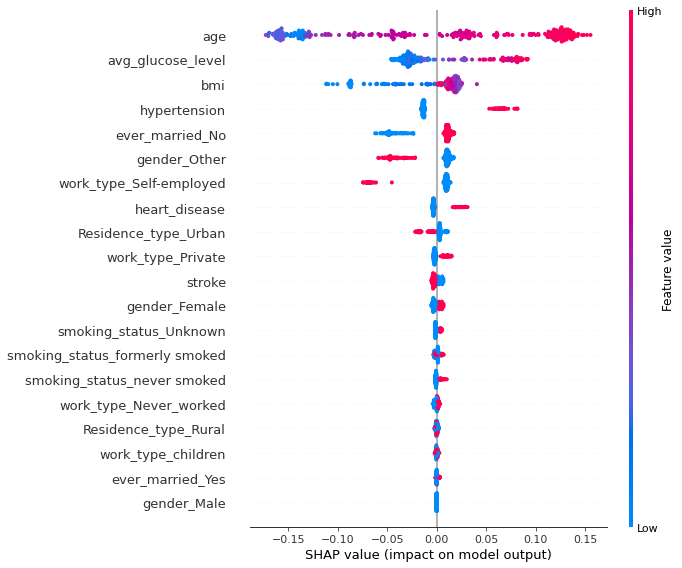

In [86]:
shap.summary_plot(shap_values[1], 
                  X_train, 
                  feature_names=df.columns)

O `sumary_plot` nos apresenta o SHAP *value* das *features* do modelo. Nesse caso, observamos que a variável `age` possui um alto impacto na classificação; temos que os valores de SHAP a esquerda representam as classificações de classe 0 (ou sem AVC), onde possuímos a maior parte das instâncias, evidenciada pela maioria de pontos nessa região. Observamos também que o modelo dintinguiu entre as classes para esse atributo, apresentando uma grande cauda para os valores de classe = 1. Conforme a importância relativa a cada variável reduz, observamos um "afunilamento" dos pontos, uma vez que se torna mais difícil para o modelo distinguir entre as classes. A variável `work_type_Govt_job` é a de menor relevância para nosso modelo, pois os pontos estão todos sobrepostos.

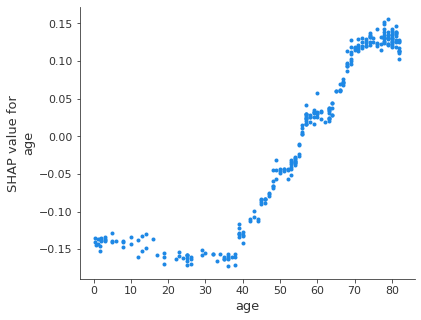

In [87]:
shap.dependence_plot(0,
                     shap_values[1],
                     features=X_train,
                     feature_names=df.columns,
                     interaction_index=None)

A plotagem acima nos mostra a relação entre os valores de SHAP e a coluna `age`. Observamos que existe uma clara separação (próximo do ponto 0.02 em $y$), onde o modelo distingue entre as classes.

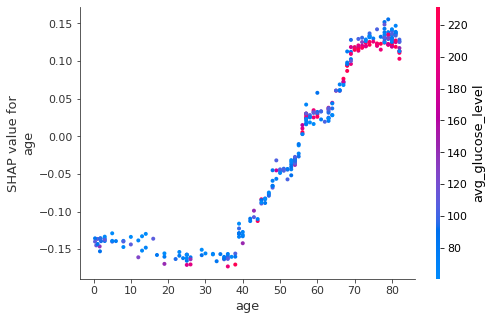

In [88]:
shap.dependence_plot(0,
                     shap_values[1],
                     features=X_train,
                     feature_names=df.columns)

Realizando a mesma plotagem acima, porém com o acréscimo da coluna `avg_glucose_level` (em gradiente), nos mostrando que temos valores altos de glucose em ambas as classes.

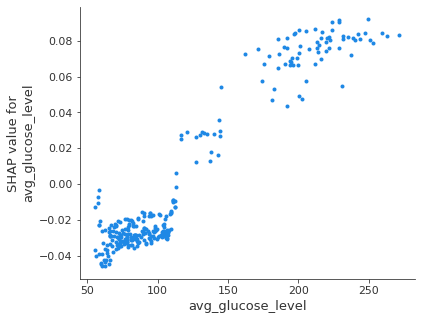

In [89]:
shap.dependence_plot(3,
                     shap_values[1],
                     features=X_train,
                     feature_names=df.columns,
                     interaction_index=None)

Agora iremos realizar a plotagem com o `avg_glucose_level` e os valores de SHAP. Nesse caso, observamos também uma distinção entre as classes por volta do valor entre 0.00 e 0.02 no eixo $y$.

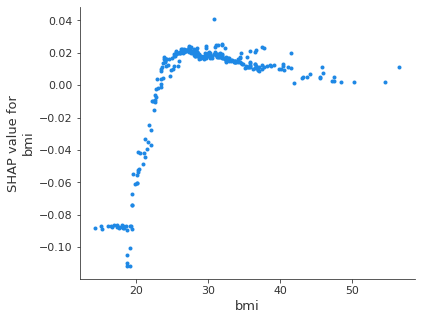

In [90]:
shap.dependence_plot(4,
                     shap_values[1],
                     features=X_train,
                     feature_names=df.columns,
                     interaction_index=None)

Por último, observamos a variável `bmi` com os valores SHAP. Nesse caso, é mais difícil para o modelo realizar a dintinção entre as classes.

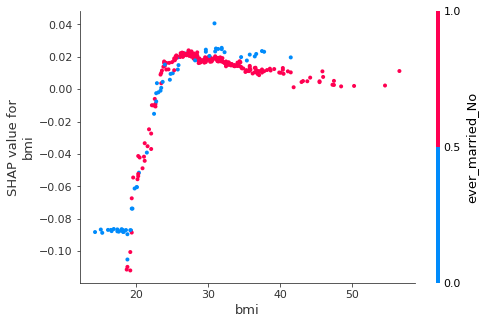

In [91]:
shap.dependence_plot(4,
                     shap_values[1],
                     features=X_train,
                     feature_names=df.columns)

Realizando a mesma plotagem anterior (SHAP e `bmi`), temos que o gradiente com a variável `hypertension` nos ajuda a dintinguir entre as classes, uma vez que valores mais elevados dessas variáveis estão associadas a maiores valors de SHAP.

Abaixo, vamos selecionar um exemplo específico (linha 42) dos dados de treino. Nesse exemplo, temos uma instância da classe 0 (sem AVC); o *plot* abaixo é destinado a explicar o impacto de cada *feature* na ponderação do modelo para realizar sua decisão.

In [92]:
# O ambiente precisa suportar js para exibir o gráfico
shap.initjs()

shap.force_plot(base_value=explainer.expected_value[1], 
                shap_values=shap_values[1][42,:], 
                features=X_train[42,:],
                feature_names=df.drop('stroke', axis=1).columns)

Observamos que as variáveis na esquerda buscam indicar que a instância representa um caso de AVC; contudo, as variáveis a direita ponderam e trazem a classificação para 0 (sem AVC). Dentre essas, a mais expressiva para esse exemplo é a variável `ever_married_No`.

## $11.$
Crie uma classe que carregue o modelo treinado do disco e tenha uma função de predição. A função de predição deve receber como parâmetro uma única amostra de dados e retorne o resultado de predição (`0` ou `1`) utilizando o limiar definido na questão 9.

### CLASSE `MLModel`

In [93]:
class MLModel():
    """
    Classe que contém métodos para carregar um modelo
    salvo em disco, realizando previsões com base em
    um threshold, definido através de uma função. A
    classe pode também ser utilizada para instanciar
    um objeto com base em um modelo passado como parâmetro.
    """

    def __init__(self, 
                 model_path: str=None, 
                 model: object=None) -> object:
        """
        Construtor que cria o objeto RandomForest
        a partir de um modelo já existente em disco,
        lendo este com base no caminho fornecido.

        Params:
            model_path: caminho para o modelo salvo em disco
            model: objeto do modelo, caso não passar o path
                    
        Returns:
            Retorna o objeto da classe construído
        """
        if model_path != None and \
           isinstance(model_path, str):

            self.model_path = model_path
            self.model = pickle.load(open(model_path, 'rb'))

        else:
            self.model_path = None
            self.model = model

    def __str__(self):
        return f'Modelo carregado de "{self.model_path}" \n' \
               f'{self.model.__str__()}'

    def predict(self, X: List) -> List:
        """
        Função que realiza a classificação a partir de um
        array recebido.

        Params:
            X: array com instâncias a serem geradas as
               classificações

        Returns:
            Retorna as classificações realizadas
        """
        return self.model.predict(X)

    def predict_proba(self, X: List) -> List:
        """
        Função que realiza a previsão baseada em probabilidades
        a partir de um array recebido.

        Params:
            X: array com instâncias a serem geradas as
               probabilidades

        Returns:
            Retorna as probabilidades de cada classe, sob
            o formato de uma lista contendo listas com os
            valores para as duas classes
        """
        return self.model.predict_proba(X)

    def threshold_predict(self, X: List) -> List:
        """
        Função que realiza a classificação a partir de um
        array recebido, utilizando o threshold definido
        como base de decisão. Caso o valor de probabilidade
        para a classe alvo seja maior que o threshold, será 
        classificado como 1, caso contrário como 0.

        Params:
            X: array com instâncias a serem geradas as
               classificações

        Returns:
            Retorna as classificações realizadas
        """
        probs = self.model.predict_proba(X)
        probs_true = [prob[1] for prob in probs]
        return [1 if i >= self.threshold \
                  else 0 for i in probs_true]

    def set_threshold(self, threshold) -> None:
        """
        Função responsável por definir o threshold
        como atributo da classe

        Params:
            threshold: limiar a ser definido

        Returns: None
        """
        self.threshold = threshold

### CARREGANDO O MODELO E REALIZANDO PREVISÕES COM A CLASSE CRIADA

In [94]:
# Carregando o modelo do disco
# Construindo um objeto da classe criada

# RandomForestClassifier
print(model_name)
ml_model = MLModel(model_name)

# Observando informações do modelo carregado
print(ml_model)

RandomForestClassifier.sav
Modelo carregado de "RandomForestClassifier.sav" 
RandomForestClassifier(max_depth=3, n_estimators=9800, random_state=42)


In [95]:
# Obtendo a amostra de índice 42 dos dados de teste
sample_X = np.reshape(X_test[42],(1,-1))
sample_y = y_test[42]

print(sample_X)
print(sample_y)

[[ 0.32  0.    0.   89.04 17.8   0.    1.    0.    1.    0.    0.    0.
   0.    0.    1.    0.    1.    1.    0.    0.    0.  ]]
[0]


A amostra obtida trata-se de um caso de não AVC (classe 0).

In [96]:
# Realizando a previsão de uma amostra obtida (sem o threshold)
print(f'Previsão sem Threshold: {ml_model \
                                 .predict(sample_X)}')

# Definindo um threshold e realizando a previsão
ml_model.set_threshold(threshold)

print(f'Previsão com Threshold: {ml_model \
                                 .threshold_predict(sample_X)}')

Previsão sem Threshold: [0]
Previsão com Threshold: [0]


### ACURÁCIA USANDO *THRESHOLD* NOS DADOS DE TREINO

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       146
           1       0.86      0.69      0.77       146

    accuracy                           0.79       292
   macro avg       0.80      0.79      0.79       292
weighted avg       0.80      0.79      0.79       292




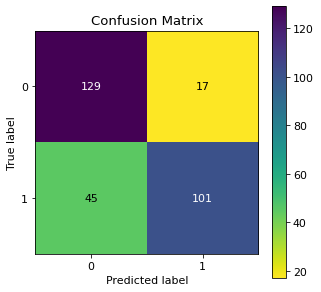

In [97]:
# RandomForestClassifier
t_preds = ml_model.threshold_predict(X_train)

print(classification_report(y_train, 
                            t_preds), end='\n\n')

plot_confusion_matrix(y_train, 
                      t_preds,
                      cmap='viridis_r',
                      figsize=(5,5));

### ACURÁCIA USANDO *THRESHOLD* NOS DADOS DE TESTE

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1165
           1       0.18      0.81      0.30        63

    accuracy                           0.81      1228
   macro avg       0.59      0.81      0.59      1228
weighted avg       0.95      0.81      0.86      1228




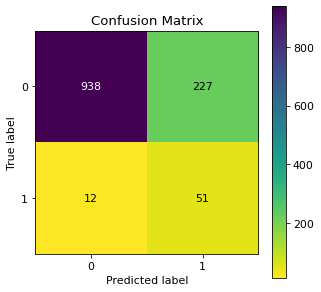

In [98]:
# RandomForestClassifier
t_preds = ml_model.threshold_predict(X_test)

print(classification_report(y_test, 
                            t_preds), end='\n\n')

plot_confusion_matrix(y_test, 
                      t_preds,
                      cmap='viridis_r',
                      figsize=(5,5));

Observamos uma maximização do *recall* (0.84). Nesse sentido, nosso modelo comete uma minoria de falsos positivos (10), em detrimento de acertar 53 de 63 casos de AVC. Considerando o contexto, é preferível cometer falsos positivos, pois o falso negativo é muito prejedicial a um indivíduo.

### ACURÁCIA USANDO *THRESHOLD* PARA DEMAIS MODELOS EM TESTE (*EXTRA*)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1165
           1       0.15      0.90      0.26        63

    accuracy                           0.74      1228
   macro avg       0.57      0.82      0.55      1228
weighted avg       0.95      0.74      0.81      1228




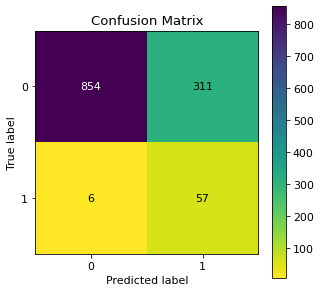

In [99]:
# LinearSVC
linear_svc = MLModel(model=lsvc)

linear_svc.set_threshold(get_threshold(lsvc_probs_true))
t_preds = linear_svc.threshold_predict(X_test)

print(classification_report(y_test, 
                            t_preds), end='\n\n')

plot_confusion_matrix(y_test, 
                      t_preds,
                      cmap='viridis_r',
                      figsize=(5,5));

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1165
           1       0.05      1.00      0.10        63

    accuracy                           0.05      1228
   macro avg       0.53      0.50      0.05      1228
weighted avg       0.95      0.05      0.01      1228




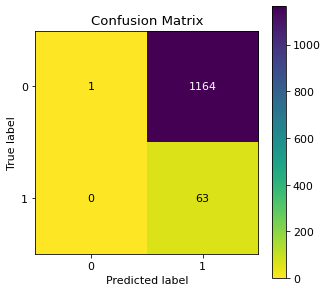

In [100]:
# MLP
multilayer_perceptron = MLModel(model=mlp)

multilayer_perceptron.set_threshold(get_threshold(mlp_probs_true))
t_preds = multilayer_perceptron.threshold_predict(X_test)

print(classification_report(y_test, 
                            t_preds), end='\n\n')

plot_confusion_matrix(y_test, 
                      t_preds,
                      cmap='viridis_r',
                      figsize=(5,5));

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      1165
           1       0.15      0.94      0.26        63

    accuracy                           0.72      1228
   macro avg       0.57      0.82      0.54      1228
weighted avg       0.95      0.72      0.80      1228




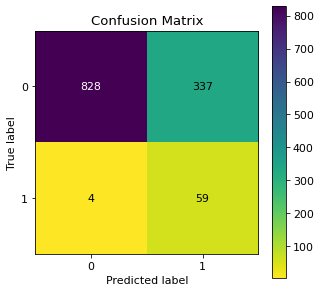

In [101]:
# StackingClassifier
stacking_clf = MLModel(model=stk)

stacking_clf.set_threshold(get_threshold(stk_probs_true))
t_preds = stacking_clf.threshold_predict(X_test)

print(classification_report(y_test, 
                            t_preds), end='\n\n')

plot_confusion_matrix(y_test, 
                      t_preds,
                      cmap='viridis_r',
                      figsize=(5,5));

## $12.$
Disserte sobre como seria o modelo ideal para que o modelo gerado seja colocado em produção, de forma que possa ser utilizado para realizar predições em tempo real.

No texto abaixo, foquei inicialmente em descrever todas as boas práticas e o processo de *deploy* de um modelo, trazendo as duas abordagens (*batch* e *stream*) descrevendo-as e escolhendo uma como uma situação ideal. Ao fim, descrevi especificamente o processo ideal de *deploy* para o modelo criado neste *notebook*, bem como algumas ferramentas que poderiam auxiliar esse processo.

### *DEPLOY* DE MODELOS PARA PREVISÃO DE AVC EM PACIENTES
##### Explorando o *deploy* de um modelo ideal e comparando as abordagens *batch* e *stream*

---

<p align="justify">
O <i>deploy</i> de modelos de <i>Machine Learning</i> é uma etapa muito ampla dentro do fluxo geral da ciência de dados, pois envolve muitos fatores e requisitos, tais como objetivo do modelo (se o modelo executa predições diárias, semanais ou mensais; se a tarefa é uma regressão, classificação, etc), quantidade de sistemas ou pessoas que demandariam acesso ao modelo (impactando portanto na disponibilidade do <i>endpoint</i>, que deveria ser capaz de processar uma quatidade $n$ de requisições simultâneas), variação temporal das <i>features</i> utilizadas pelo modelo, e por fim o tipo de aprendizado adotado: modelos em <b><i>batch</i></b> ou <b><i>stream</i></b>. 
</p>

<p align="justify">
Para além dos pontos mencionados acima, temos ainda inúmeros outros fatores a serem levados em consideração; o ponto essencial a ser destacado é: o <em>deploy</em> dos modelos depende de inúmeros <strong>requisitos funcionais</strong> e <strong>não funcionais</strong>, e idealmente deve seguir as boas práticas da <strong>engenharia de</strong> <strong><em>software</em></strong>, de maneira a assegurar um produto eficiente e escalável, maximizando o desempenho em contrapartida de um custo computacional e financeiro reduzidos, mantendo o equilíbrio entre esses fatores na medida da necessidade e objetivo.
</p>

<p align="justify">
Considerando as duas abordagens de aprendizado supracitadas (<em>batch</em> e <em>stream</em>), iremos destacar características de um modelo ideal para ambos cenários, bem como comparando essas abordagens e concluindo acerca da melhor escolha dentro das nossas necessidades: queremos um modelo que faça predições em tempo real, no escopo da previsão de AVC.
</p>

<p align="justify">
Antes de seguir para a análise das duas abordagens, vou levantar pontos essenciais para ambos casos, de maneira a assegurar eficiência no <em>deploy</em> do modelo. O primeiro fator a ser destacado é: para o bom funcionamento e conclusão do nosso objetivo, é indispensável possuirmos práticas desenvolvidas de <strong>engenharia de dados</strong>, nos permitindo extrair dados da fonte, transformá-los de acordo com os nossos interesses, e re-treinar nosso modelo para mantê-lo atualizado frente às mudanças das variáveis ao longo do tempo, evitando assim sua defasagem. No tocante aos <strong>requisitos não funcionais</strong>, temos: eficiência (processamento de $n$ requisições simultâneas); disponibilidade (por exemplo, o modelo ficar disponível em 99% do tempo para outras aplicações); interoperabilidade (o modelo deve permitir seu ajuste, alteração, manutenção, re-treino, entre outros); ética e legalidade, uma vez que o modelo deve respeitar as diretrizes legais acerca do uso de dados, como é o caso da LGPD, e da não utilização de dados de cunho privativo. Os requisitos não funcionais acima dependem fortemente dos objetivos e contexto apresentados.
</p>

<p align="justify">
Começando com os modelos em <strong><em>batch</em></strong>, que se aproxima mais da realidade deste <em>notebook</em>, temos por exemplo os algoritmos <code>RandomForestClassifier</code>, <code>XGBClassifier</code>, entre outros modelos tradicionais e <em>ensembles</em>. Os modelos <em>batch</em> utilizam &quot;lotes&quot; de dados para treinamento e teste, tratando o comportamento da realidade como algo estático. Como é possível observar, a realidade é contínua e dinâmica, portanto, a utilização ingênua de lotes de dados para criação de modelos, seguido de seu <em>deploy</em> sem demais manutenções e acompanhamento, está fadada na maior parte das situações à defasagem. Nesse caso, considerando ainda a tarefa de classificação de AVC em indivíduos, teríamos de possuir um <strong>fluxo de Machine Learning e engenharia de dados</strong> que nos permitissem coletar dados de maneira periódica (podendo ser, por exemplo, diariamente), e constantemente acompanhar as métricas do modelo, realizando o re-treino deste, de maneira a acompanhar a mudança das variáveis. Esse re-treino poderia ocorrer em lotes, uma vez que os processos de ETL poderiam extrair os dados, e o processo de treino fosse realizado.
</p>

<p align="justify">
No caso dos modelos <em>stream</em>, temos, por exemplo: <code>Hoeffding Tree</code>, <code>Hoeffding Adaptive Tree</code>, <code>Leveraging Bagging</code> e <code>Adaptive Random Forest</code>. Esses modelos utilizam dados minerados em tempo real, buscando se adaptar à mudança das <em>features</em> ao longo do tempo. Aliado a sua implementação, seria indispensável possuir um fluxo de dados <em>stream</em>, com boa velocidade, idealmente baixa latência e também processamento distribuído de dados. Esses modelos, como demonstrado em pesquisas recentes, são comparáveis aos modelos em <em>batch</em> para diversas tarefas, entre elas a análise de crédito.
</p>

<p align="justify">
Considerando os pontos levantados, e como conclusão acerca do nosso contexto, para as duas abordagens temos que: é indispensável possuirmos um fluxo de engenharia de dados muito sólido como requisito para o modelo; após essa etapa, temos de escolher uma das duas abordagens. Especificamente no nosso problema, poderíamos utilizar a abordagem em <em>batch</em>, uma vez que a defasagem das variáveis não é tão rápida e dinâmica (um cenário onde isso ocorre é a bolsa de valores, ou então com análise de crédito). Nesse caso, idealmente extrairíamos dados com ferramentas distribuídas utilizando ferramentas em <em>cloud</em>, para então realizarmos o re-treino de nosso modelo periodicamente, acompanhando métricas específicas, realizando esse processo de madrugada para assegurar a disponibilidade do <em>endpoint</em> durante o dia. O deploy do modelo poderia ser realizado também na <em>cloud</em>, utilizando ferramentas dedicadas à MLOps. Contudo, esse processo com modelos em <i>batch</i> é custoso, pois o esforço computacional e acompanhamento por um time dedicado é necessário; considerando esse aspecto, temos a alternativa dos modelos em <i>stream</i>. Uma vez que já possuímos um fluxo de dados estabelecidos, buscaríamos consolidar um fluxo de extração em tempo real para suportar a implementação de um modelo desta natureza. Portanto, um modelo ideal se adaptaria às mudanças externas, pois recebe dados em tempo real e busca contronar sua defasagem, operando em <em>cloud</em> para reduzir custos, e utilizando menos esforço computacional, pois não precisa ser re-treinado com tanta frequência, assegurando um desemepnho equivalente, em contrapartida de um custo menor.
</p>

<p align="justify">
Como conclusão, um modelo ideal para essa tarefa opera em <i>stream</i>, recebendo dados em tempo real e se adaptando em relação à variação das <em>features</em> ao longo do tempo. O modelo também utilizaria baixo esforço computacional (pois não seria constantemente re-treinado), custo reduzido (pois operaria em <em>cloud</em> e não precisaria de tanto acompanhamento), bem como asseguraria uma velocidade extra, visto que se adapta às mudanças externas, bem como mantém uma qualidade equivalente. Falando sobre a implementação deste modelo, poderíamos utilizar uma <code>Hoeffding Adaptive Tree</code>, com <i>deploy</i> no <code>Google Cloud Platform</code>, utilizando o serviço <code>Dataflow</code> para processos de ETL em tempo real (que utiliza internamente <em>clusters hadoop</em> e computação distribuída), bem como os serviços <code>Vertex AI</code> e <code>Auto ML</code> para gerenciamento e acompanhamento desses modelos. A combinação dos serviços acima criaria um modelo rápido, adaptativo, com custo restrito à quantidade de dados em fluxo, escalável, com alta disponibilidade, baixa latência, redução de manutenção e alta eficiência. Como aliado, também poderíamos utilizar bibliotecas auxiliares do <i>Python</i>, como <code>MLflow</code>. Para além de questões de infraestrutura, o modelo deve minimizar os falsos negativos, uma vez que é muito prejudicial para um indivíduo e pode prejudicá-lo, induzindo a pessoa a não buscar tratamento.
</p>

<p align="justify">
Agora que comentamos sobre o modelo ideal para essa tarefa, vamos focar no modelo criado, considerando seu <em>deploy</em> e a forma ideal de realizá-la. O modelo criado opera em <em>batch</em>, portanto precisaríamos de um fluxo de dados sólido. Da mesma forma que o modelo em <em>stream</em> descrito, poderíamos realizar seu <em>deploy</em> na <code>Google Cloud Platform</code>, utilizando o serviço <code>DataFlow</code> em modo <em>batch</em> para os fluxos ETL, os serviços <code>Vertex AI</code> e <code>Auto ML</code> para gerenciar o modelo, agendando tarefas de treinamento e auto ML, de maneira a automatizar parcialmente esse processo e evitar custos. O modelo seria constantemente re-treinado de maneira autônoma, considerando os funcionamentos da plataforma, de maneira a se adaptar às variações das <em>features</em>, agendando esse processo periodicamente. A situação é bem parecida com o modelo em <em>stream</em> descrito, com a diferença que teríamos de monitorar algumas métricas e executar essas tarefas de atualização. Por fim, teríamos um modelo com custo restrito à quantidade de dados utilizada (e logo também a computação necessária) e ao time que prestará manutenção ao modelo, acompanhando métricas de desempenho e trabalhando com <i>tasks</i> de atualização. O resultado final seria aproximadamente semelhante ao descrito no parágrafo anterior: um modelo rápido, escalável, com alta disponibilidade, eficiência, confiabilidade, redução da taxa de falsos negativos, baixa latência e custo computacional reduzido. Um fator especialmente importante para esse modelo em detrimento do anterior, é a interoperabilidade: como o modelo deverá ser constantemente atualizado e re-treinado, é de extrema importância que o código seja limpo, documentado, organizado, legível, e também eficiente, uma vez que que esse processo não poderá ser demasiamente demorado, e a operabilidade desse código deve ser rápida.
</p>

## $13.$
Escreva uma função que receba uma lista (`array`) de números inteiros e retorne um *booleano* (`True` ou `False`) indicando se a lista é monotônica. Para essa não é permitido o uso de nenhuma biblioteca, somente a linguagem *Python* com seus tipos nativos.

### FUNÇÃO PRINCIPAL CRIADA: `isMonotonic`

In [102]:
# Função principal
# Utilizando recursão
def isMonotonic(A: List[int]) -> bool:
    increasing = lambda A: True if len(A) == 1 else (increasing(A[1:]) if A[0:2][0] <= A[0:2][1] else False)
    decreasing = lambda A: True if len(A) == 1 else (decreasing(A[1:]) if A[0:2][0] >= A[0:2][1] else False)
    return increasing(A) or decreasing(A)

**Explicação de** `isMonotonic` <br>
<p align="justify">A função <code>isMonotonic</code> utiliza duas funcões (<code>increasing</code> e <code>decreasing</code>), ambas com recursão. As funções retornam um <em>booleano</em>, respectivamente caso a lista <code>A</code> seja monotonicamente crescente (<code>increasing</code>), ou seja, todos os valores crescem sem valores menores que seu antecessor, permitindo que estes sejam iguais, ou então monotonicamente decrescente (<code>decreasing</code>). Caso algumas das condições sejam atendidas, o retorno é <code>True</code>, indicando que a lista <code>A</code> é monotônica. Em cada função recursiva, temos como entrada a lista <code>A</code>; o critério de parada é restar somente um elemento na lista. O passo recursivo é: retirar dois elementos iniciais da lista, realizar a comparação (para <code>increasing</code> é <code>&lt;elemento1 &lt;= elemento2&gt;</code> e para <code>decreasing</code> é <code>&lt;elemento1 &gt;= elemento2&gt;</code>); caso a comparação retorne <code>False</code> (ou seja, os pares não satisfazem nossa condição de crescimento ou decresimento) a função retorna <code>False</code> e interrompe o passo recursivo); caso a condição dos pares iniciais seja satisfeita, continuamos o processo recursivo passando novamente a lista <code>A</code> como parâmetro, porém a partir da primeira posição (<code>A[1:]</code>), uma vez que já realizamos a comparação dos pares iniciais, e agora precisamos comparar todos os demais. Caso as condições de crescimento ou decrescimento não sejam atendidas em alguns dos pares da lista <code>A</code>, interrompemos a recursão e retornamos <code>False</code>.</p>


Testando a função `isMonotonic`

In [103]:
# Matriz com listas a serem testadas 
# (testes unitários)
array_matrix = [[1,2,3,4,5,6], # True
                [1,1,2,2,2,2], # True
                [0,1,0,3,2,1], # False
                [0,0,0,0,0,0], # True
                [-1,-3,1,3,4], # False
                [9,9,2,2,1,1], # True
                [-1,-1,-2,-3], # True
                [0,1,0,1,0,1], # False
                [1,1,1,-2,-1]] # False

# Resultados dos testes unitários, respectivamente
array_matrix_true = []
for i in array_matrix:
    array_matrix_true.append(pd.Series(i).is_monotonic_increasing or \
                             pd.Series(i).is_monotonic_decreasing)
  
# Aplicando a função 'isMonotonic' a cada lista da matriz
for array, i in zip(array_matrix,
                    range(len(array_matrix))):
    
    print(f'Obtido: {isMonotonic(array)} \t '
          f'Esperado: {array_matrix_true[i]} \t'
          f'Passou? {isMonotonic(array) == array_matrix_true[i]}')

Obtido: True 	 Esperado: True 	Passou? True
Obtido: True 	 Esperado: True 	Passou? True
Obtido: False 	 Esperado: False 	Passou? True
Obtido: True 	 Esperado: True 	Passou? True
Obtido: False 	 Esperado: False 	Passou? True
Obtido: True 	 Esperado: True 	Passou? True
Obtido: True 	 Esperado: True 	Passou? True
Obtido: False 	 Esperado: False 	Passou? True
Obtido: False 	 Esperado: False 	Passou? True


### DEMAIS FUNÇÕES CRIADAS (*EXTRA*)

Foram criadas outras funções que realizam o mesmo que `isMonotonic`. Todas as funções foram submetidas à uma bateria de testes. Ao final, caso todas as funções tenham passado em cada um dos testes, obtemos `True` na coluna `'passed?'`

In [104]:
# Variação 'a'
# Utilizando 'for'
def isMonotonic_a(A: List[int]) -> bool:
    c1, c2 = 0, 0 
    for i in range(len(A)-1): 
        if A[i+1] > A[i]: 
            c1 += 1 
        elif A[i+1] < A[i]: 
            c2 += 1 
    return True if 0 in [c1, c2] else False

**Explicação de** `isMonotonic_a` <br>
Essa função realiza a comparação entre cada par da lista `A`; caso algumas das condições seja atendida (`c1` ou `c2`, respectivamente crescente e decrescente), aumentamos `1` em cada uma das variáveis. Ao fim, se alguns dos valores das variáveis de condição for `0`, temos que a lista `A` satisfaz alguma das condições de lista monotônica, uma vez que somente outra condição foi atendida (e ambas são excludentes). Para essa função, é importante que utilizemos `>` e `<` ao invés de `>=` e `<=`, uma vez que, caso alguma dessas condições sejam atendidas, teremos `1` em ambas variáveis (retornando uma resposta `False` sempre). Nesse caso, quando existir uma sequência de valores iguais (e.g. `[1,1, ...]`, nossa condição não será atendida, portanto, não adicionaremos `1` à variável.

In [105]:
# Variação 'b'
# Utilizando 'list comprehension'
def isMonotonic_b(A: List[int]) -> bool:
    return all([A[i] <= A[i+1] for i in range(len(A)-1)]) or \
           all([A[i] >= A[i+1] for i in range(len(A)-1)])

**Explicação de** `isMonotonic_b` <br>
<p align="justify">Os trechos <code>A[i] &lt;= A[i+1]</code> e <code>A[i] &gt;= A[i+1]</code> são executados no formato de <em>list comprehension</em>, para todos os elementos do intervalo entre 0 até o penúltimo index da lista <code>A</code> (pois se fosse até o último daria um erro, uma vez que não teríamos um índice <code>i+1</code> para realizar a comparação). Temos, nesse caso, essa comparação ocorrendo a cada par de elementos da lista <code>A</code>, e em cada caso obtemos um valor <code>True</code> ou <code>False</code>; caso em algum trecho existam dois valores tais que <code>A[i] &lt;= A[i+1]</code> ou <code>A[i] &gt;= A[i+1]</code> não sejam atendidos, teremos um valor <code>False</code> em cada uma das listas. Nesse caso, a função <code>all</code> retorna <code>True</code> somente quando todas as ocorrências de uma determinada lista são <code>True</code>, então precisamos que todos os pares comparados satisfaçam as condições; ao final, se todos os elementos da nossa lista <code>A</code> forem descrescentes em todos os pares, sem exceção, o retorno da função <code>all</code> será <code>True</code> e satisfazemos nossa primeira condição, então a lista <code>A</code> é monotônica. A outra opção, demarcada pelo OU da função, é todos os pares atenderem a condição de <code>A[i] &gt;= A[i+1]</code>, indicando uma lista com valores crescentes, e também monotônica. Em outras palavras, se a primeira condição OU a segunda condições forem atendidas, a lista <code>A</code> é monotônica.</p>


In [106]:
# Variação 'c'
# Utilizando 'map'
def isMonotonic_c(A: List[int]) -> bool:
    return all(map(lambda x: True if x <= 0 else False, [A[i] - A[i+1] for i in range(len(A)-1)])) or \
           all(map(lambda x: True if x >= 0 else False, [A[i] - A[i+1] for i in range(len(A)-1)]))

**Explicação de** `isMonotonic_c` <br>
Função que aplica uma função a todos os elementos da lista `A`, funcionando na mesma lógica das anteriores: caso a lista seja monotonicamente crescente ou decrescente, retornamos `True`. Em todos os resultados `True` e `False` obtidos pela aplicação do `map`, utilizamos a função `all`, para saber se todos os valores são `True`, ou seja, se todos os pares atenderam nossas condições. Com relação às condições de crescimento e decrescimento, temos que, caso a diferença do par de valores seja `>= 0`, temos um caso de lista crescente; no caso alternativo (`<= 0`), temos uma lista decrescente. Caso, em algum dos pares, esse padrão não se mantenha, temos algum valor `False`, que retornaria `False` na função `all`. Por exemplo, uma lista `[1,2,1]`, mapeada, retornaria o primeiro par: `[1,2]`, que nos daria `1`, e logo `True` para a condição de crescimento; o outro par, `[2,1]`, retornaria `-1`, e logo `False` para a mesma condição. Ao final, a função `all` receberia `[True, False]`, e logo nos daria o retorno `False` (a lista não é monotônica).

In [107]:
# Variação 'd'
# Utilizando 'list comprehension'
def isMonotonic_d(A: List[int]) -> bool:
    c1, c2 = [], [] 
    [c1.append(1) if A[i+1] > A[i] else \
     c2.append(1) if A[i+1] < A[i] else -1 for i in range(len(A)-1)]
    return True if 0 in [sum(c1), sum(c2)] else False

**Explicação de** `isMonotonic_d` <br>
Essa função segue a mesma lógica de `isMonotonic_a`, com a diferença que as variáveis de condição `c1` e `c2` são listas, e ao invés de somarmos `1` em cada variável cada vez que as condições são atendidas, realizamos um `append(1)` nas listas. Ao final, realizamos a soma das respectivas listas, e verificamos se alguma dessas somas retornou `0`.

### TESTANDO TODAS AS DEMAIS FUNÇÕES CRIADAS!

Foi criado um `DataFrame` para testar todas as funções. Temos a coluna *array*, com o *input* de cada função, sendo um *array* por linha. Temos também cada coluna seguinte representando os resultados de cada função para o *input* recebido; a penúltima coluna (`monotonic?`) é o gabarito, ou seja, se de fato o *array* é monotônico. Caso todos os resultados das funções sejam iguais ao gabarito, a última coluna (`passed?`) terá o valor `True`. De maneira a testar as funções, utilizei um *array* base (`[-1.01,-1,0,1,2,5,5.01]`), do qual foram geradas todas suas permutações, e cada permutação possível é um *input* a ser passado para as funções. Como o *array* base possui 7 elementos, o total de permutações é $7!$, ou seja, 5040 *arrays* diferentes.

In [108]:
# DataFrame para testes unitários
unit_tests = pd.DataFrame()

# Array base do qual serão geradas as permutações
base_array = [-1.01,-1,0,1,2,5,5.01]
perm = [list(i) for i in list(permutations(base_array))]

print(f'Quantidade de Elementos: {len(base_array)}')
print(f'Permutações: {len(base_array)}! = {len(perm)}')

# Coluna com os arrays
unit_tests['array'] = perm

# Criando coluna 'gabarito', indicando se o array é monotônico
m_true = []
for array in unit_tests['array']:
    m_true.append(pd.Series(array).is_monotonic_increasing or
                  pd.Series(array).is_monotonic_decreasing)
    
# Funções criadas
funcs = {
    'isMonotonic': isMonotonic,
    'isMonotonic_a': isMonotonic_a,
    'isMonotonic_b': isMonotonic_b,
    'isMonotonic_c': isMonotonic_c,
    'isMonotonic_d': isMonotonic_d
}

# Adicionando colunas com o resultado das funções no df
for func_name, func in zip(list(funcs.keys()),
                           list(funcs.values())):
    m = []
    for array in unit_tests['array']:
        m.append(func(array))
    unit_tests[func_name] = m

# Adicionando coluna gabarito
unit_tests['monotonic?'] = m_true

Quantidade de Elementos: 7
Permutações: 7! = 5040


In [109]:
# Criando coluna que indica se o teste passou
# Caso todas as funções retornem uma resposta igual à coluna gabarito,
# o teste passou
unit_tests['passed?'] = all([unit_tests[var].equals(unit_tests['monotonic?']) \
                             for var in unit_tests.columns[1:-1]])

**Resultados dos Testes**

In [110]:
print(unit_tests.shape)
unit_tests

(5040, 8)


,array,isMonotonic,isMonotonic_a,isMonotonic_b,isMonotonic_c,isMonotonic_d,monotonic?,passed?
0,"[-1.01, -1, 0, 1, 2, 5, 5.01]",True,True,True,True,True,True,True
1,"[-1.01, -1, 0, 1, 2, 5.01, 5]",False,False,False,False,False,False,True
2,"[-1.01, -1, 0, 1, 5, 2, 5.01]",False,False,False,False,False,False,True
3,"[-1.01, -1, 0, 1, 5, 5.01, 2]",False,False,False,False,False,False,True
4,"[-1.01, -1, 0, 1, 5.01, 2, 5]",False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
5035,"[5.01, 5, 2, 1, -1.01, 0, -1]",False,False,False,False,False,False,True
5036,"[5.01, 5, 2, 1, -1, -1.01, 0]",False,False,False,False,False,False,True
5037,"[5.01, 5, 2, 1, -1, 0, -1.01]",False,False,False,False,False,False,True
5038,"[5.01, 5, 2, 1, 0, -1.01, -1]",False,False,False,False,False,False,True


In [111]:
# Apenas duas permutações eram monotônicas
unit_tests['monotonic?'].value_counts()

False    5038
True        2
Name: monotonic?, dtype: int64

**Temos apenas dois *arrays* gerados como sendo monotônicos?** <br>
Sim, apenas a permutação `[-1.01, -1, 0, 1, 2, 5, 5.01]` (crescente) e `[5.01, 5, 2, 1, 0, -1, -1.01]` (decresente) são monotônicas, uma vez que todas as demais são um intermediário entre crescente e decrescente (ou seja, possuem trechos onde são crescentes e trechos onde são decrescentes), e portanto não monotônicas. Todas as demais permutações foram um teste para as funções, uma vez que essas deveriam dar a resposta `False` para todas elas e `True` para os dois casos onde os *inputs* eram monotônicos.

**Todos os Testes Passaram?**

In [112]:
# Todos os testes passaram? (True)
all_passed = all(unit_tests['passed?'])

print(f"Obtido: {all_passed} \t Esperado: True \t" \
      f"Conclusão: {'Todos os testes passaram!' if all_passed \
                     else 'Pelo menos um teste não passou!'}")

# Existe algum teste que não passou? (False)
false_in_results = False in unit_tests['passed?'].values

print(f"Obtido: {false_in_results} \t Esperado: False \t" \
      f"Conclusão: {'Nenhum teste não passou!' if false_in_results == False \
                     else 'Pelo menos um teste não passou!'}")

# Conclusão Final
print(f"\nConclusão Final: {'Todas as funções criadas passaram nos ' + \
                             str(unit_tests.shape[0]) + ' testes!' \
                             if (all_passed and false_in_results == False) \
                             else 'Ao menos uma função não passou em algum dos testes!'}")

Obtido: True 	 Esperado: True 	Conclusão: Todos os testes passaram!
Obtido: False 	 Esperado: False 	Conclusão: Nenhum teste não passou!

Conclusão Final: Todas as funções criadas passaram nos 5040 testes!
